In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import cross_val_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [90]:
df_origin = pd.read_csv('train.csv')
df = df_origin.copy()
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Family/kid friendly"",Essentials,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c034-459c-bc82-6522c957627c.jpg?aki_policy=small,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4b65-452a-b48a-bfecb3b58a66.jpg?aki_policy=small,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air conditioning"",Kitchen,Breakfast,""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_50""}",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,""Indoor fireplace"",""Buzzer/wireless intercom"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Fire extinguisher"",Essentials}",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9c86-41ea-a735-43d933111063.jpg?aki_policy=small,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo}",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
df.shape

(74111, 29)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.000000,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
log_price,74111.0,4.782069e+00,7.173938e-01,0.000000,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00
accommodates,74111.0,3.155146e+00,2.153589e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,73911.0,1.235263e+00,5.820441e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
latitude,74111.0,3.844596e+01,3.080167e+00,33.338905,3.412791e+01,4.066214e+01,4.074610e+01,4.239044e+01
longitude,74111.0,-9.239753e+01,2.170532e+01,-122.511500,-1.183424e+02,-7.699696e+01,-7.395466e+01,-7.098505e+01
number_of_reviews,74111.0,2.090057e+01,3.782864e+01,0.000000,1.000000e+00,6.000000e+00,2.300000e+01,6.050000e+02
review_scores_rating,57389.0,9.406736e+01,7.836556e+00,20.000000,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,74020.0,1.265793e+00,8.521435e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,73980.0,1.710868e+00,1.254142e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01


In [6]:
df.nunique()

id                        74111
log_price                   767
property_type                35
room_type                     3
amenities                 67122
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73479
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74111
longitude                 74111
name                      73359
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
thumbnail_url             65883
zipcode                     769
bedrooms                     11
beds                         18
dtype: int64

In [7]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [8]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [4]:
missing_percentage = df.isnull().mean() * 100
# Filter columns with missing values
columns_with_missing_values = missing_percentage[missing_percentage > 0]
# Print the columns with missing values and their percentages
for column, percentage in columns_with_missing_values.items():
    print(f"{column}' : {percentage:.2f}%")

bathrooms' : 0.27%
first_review' : 21.41%
host_has_profile_pic' : 0.25%
host_identity_verified' : 0.25%
host_response_rate' : 24.69%
host_since' : 0.25%
last_review' : 21.36%
neighbourhood' : 9.27%
review_scores_rating' : 22.56%
thumbnail_url' : 11.09%
zipcode' : 1.30%
bedrooms' : 0.12%
beds' : 0.18%


In [91]:
pd.set_option('display.max_colwidth', 0)
df[['property_type','room_type','bed_type','cancellation_policy',
      'cleaning_fee','city','host_has_profile_pic','host_identity_verified',
     'host_response_rate','instant_bookable','neighbourhood']].agg(['unique']).transpose()

,unique
property_type,"[Apartment, House, Condominium, Loft, Townhouse, Hostel, Guest suite, Bed & Breakfast, Bungalow, Guesthouse, Dorm, Other, Camper/RV, Villa, Boutique hotel, Timeshare, In-law, Boat, Serviced apartment, Castle, Cabin, Treehouse, Tipi, Vacation home, Tent, Hut, Casa particular, Chalet, Yurt, Earth House, Parking Space, Train, Cave, Lighthouse, Island]"
room_type,"[Entire home/apt, Private room, Shared room]"
bed_type,"[Real Bed, Futon, Pull-out Sofa, Couch, Airbed]"
cancellation_policy,"[strict, moderate, flexible, super_strict_30, super_strict_60]"
cleaning_fee,"[True, False]"
city,"[NYC, SF, DC, LA, Chicago, Boston]"
host_has_profile_pic,"[t, nan, f]"
host_identity_verified,"[t, f, nan]"
host_response_rate,"[nan, 100%, 71%, 68%, 67%, 83%, 50%, 90%, 86%, 92%, 82%, 80%, 89%, 93%, 99%, 0%, 88%, 96%, 70%, 94%, 91%, 25%, 95%, 98%, 62%, 29%, 33%, 81%, 63%, 38%, 60%, 79%, 78%, 75%, 65%, 97%, 87%, 40%, 54%, 53%, 58%, 76%, 30%, 64%, 17%, 20%, 77%, 73%, 41%, 59%, 57%, 85%, 56%, 42%, 44%, 35%, 14%, 74%, 27%, 10%, 84%, 6%, 72%, 36%, 55%, 43%, 13%, 39%, 46%, 26%, 61%, 52%, 23%, 22%, 69%, 66%, 15%, 11%, 31%, 21%, 47%]"
instant_bookable,"[f, t]"


In [92]:
duplicates = df.duplicated(keep=False)
print(df[duplicates])

Empty DataFrame
Columns: [id, log_price, property_type, room_type, amenities, accommodates, bathrooms, bed_type, cancellation_policy, cleaning_fee, city, description, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, instant_bookable, last_review, latitude, longitude, name, neighbourhood, number_of_reviews, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds]
Index: []

[0 rows x 29 columns]


In [93]:
#dropping duplicated colunms
df=df.drop_duplicates()

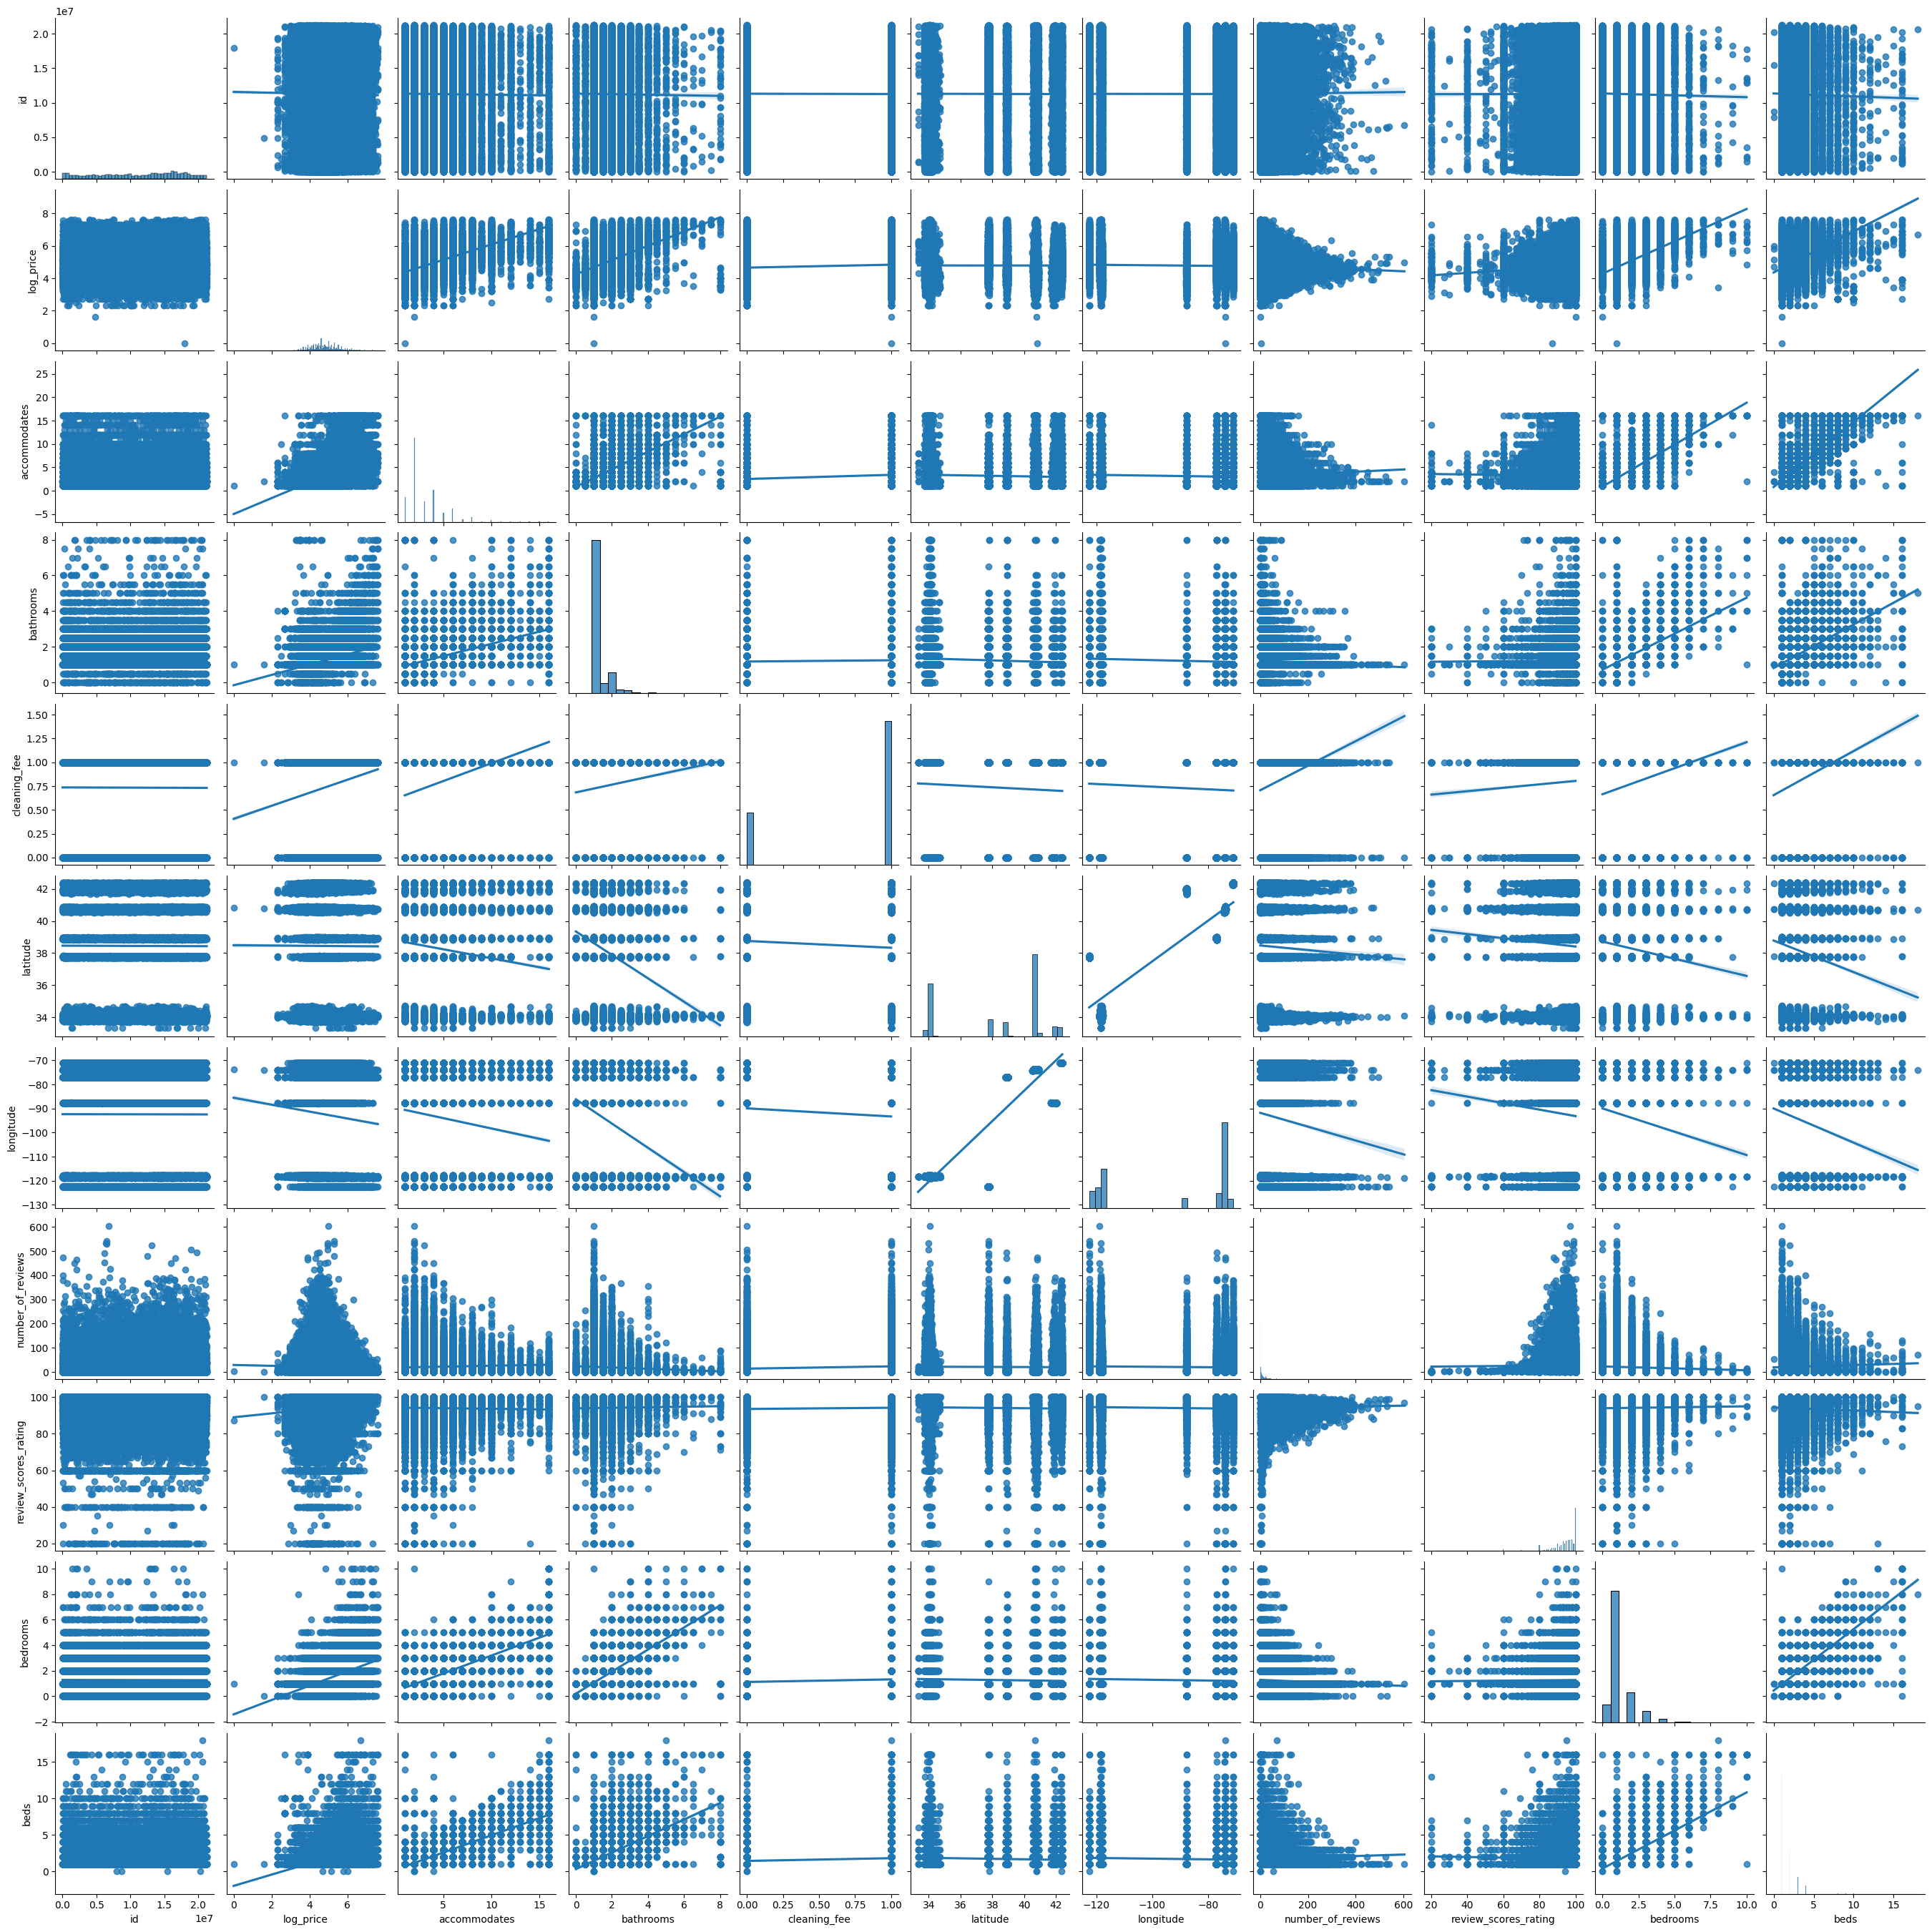

In [11]:
#We created a pair of scatterplots that are used to visualize 
  #the relationship of variables in the DataFrame to each other.
import seaborn as sns
sns.pairplot(df, kind  ="reg");

In [94]:
df['id']

0        6901257 
1        6304928 
2        7919400 
3        13418779
4        3808709 
          ...    
74106    14549287
74107    13281809
74108    18688039
74109    17045948
74110    3534845 
Name: id, Length: 74111, dtype: int64

In [ ]:
# Id is dropped since it has no affect.
df.drop("id" , axis=1 , inplace=True)

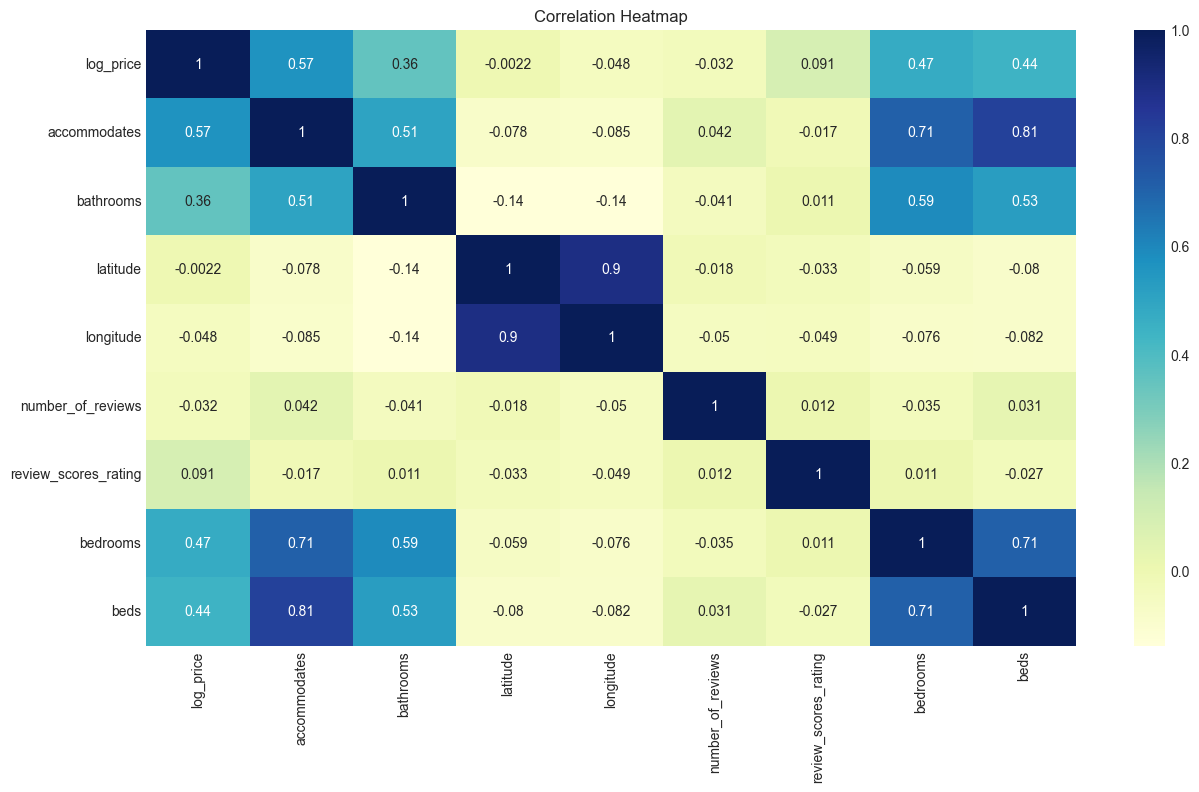

In [97]:
#we check correlation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=np.number).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 8))
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap")
plt.show()


<Axes: >

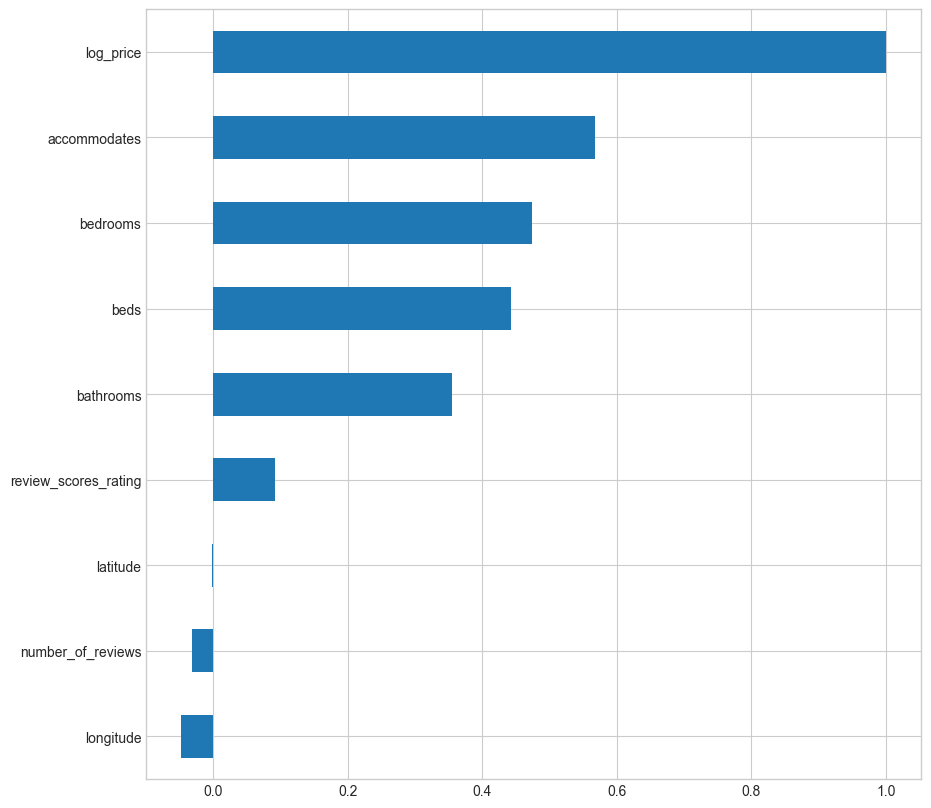

In [98]:

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(10,10))
df[numeric_columns].corr()["log_price"].sort_values().plot(kind="barh")

In [156]:
#we check the correlation between our target variable and other columns
target_correlation = df[numeric_columns].corr()['log_price'].abs().sort_values(ascending=False)
target_correlation

log_price               1.000000
accommodates            0.567574
bedrooms                0.473212
beds                    0.442153
bathrooms               0.355174
review_scores_rating    0.074822
longitude               0.047529
number_of_reviews       0.012577
latitude                0.002193
Name: log_price, dtype: float64

##### Most related numeric columns with target are:accommodates ,bedrooms ,bathrooms

# Handling Missing Values

In [68]:
df.isnull().sum()

log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 200  
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
description               0    
first_review              15864
host_has_profile_pic      188  
host_identity_verified    188  
host_response_rate        18299
host_since                188  
instant_bookable          0    
last_review               15827
latitude                  0    
longitude                 0    
name                      0    
neighbourhood             6872 
number_of_reviews         0    
review_scores_rating      16722
thumbnail_url             8216 
zipcode                   966  
bedrooms                  91   
beds                      131  
dtype: int64

#### id, log_price ,property_type ,room_type,amenities,accommodates, bed_type, cancellation_policy ,cleaning_fee  

In [ ]:
#They have no missing value

#### property_type -Feature enginerering kismina gidecek

In [69]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Others' #???????????????????calistirmadim

### bathrooms

In [ ]:
df["bathrooms"].isnull().sum()

In [99]:
# There only 200 missing values. It makes no difference
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))

In [71]:
df["bathrooms"].isnull().sum()

0

#### city

In [72]:
df['city']

0        NYC
1        NYC
2        NYC
3        SF 
4        DC 
         .. 
74106    NYC
74107    LA 
74108    NYC
74109    NYC
74110    LA 
Name: city, Length: 74111, dtype: object

In [73]:
df['city'].isnull().sum()

0

### description

In [74]:
df['description']

0        Beautiful, sunlit brownstone 1-bedroom in the loveliest neighborhood in Brooklyn. Blocks from the promenade and Brooklyn Bridge Park, with their stunning views of Manhattan, and from the great shopping and food.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [75]:
df['description'].isnull().sum()

0

### first_review-last_review

In [419]:
df['first_review'].isnull().sum()

0

In [418]:
df['first_review']

0        2016-06-18 00:00:00
1        2017-08-05 00:00:00
2        2017-04-30 00:00:00
3        0000-00-00         
4        2015-05-12 00:00:00
                ...         
74106    0000-00-00         
74107    2016-08-15 00:00:00
74108    2015-01-03 00:00:00
74109    0000-00-00         
74110    2013-09-05 00:00:00
Name: first_review, Length: 74111, dtype: object

In [420]:
df['last_review'].isnull().sum()

0

In [421]:
df['last_review']

0        2016-07-18 00:00:00
1        2017-09-23 00:00:00
2        2017-09-14 00:00:00
3        0000-00-00         
4        2017-01-22 00:00:00
                ...         
74106    0000-00-00         
74107    2017-04-15 00:00:00
74108    2017-09-10 00:00:00
74109    0000-00-00         
74110    2017-04-30 00:00:00
Name: last_review, Length: 74111, dtype: object

In [119]:
# Feature engineeringe tasinacak
from datetime import datetime
df["day_count"] = (datetime.today()-df['last_review'])

In [ ]:
df["day_count"]

In [109]:
df["day_count"]=df["day_count"].str.replace(' days','')

In [121]:
 # Converting to datetime
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)

In [122]:
df['first_review'].dtype

dtype('<M8[ns]')

In [123]:
#We calculated the percentage of blank values in the first_review and review_scores_rating columns
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'last_review': {round(100*df.last_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 21.4%
Null values in 'last_review': 21.4%
Null values in 'review_scores_rating': 22.6%


In [124]:
#We checked for the same null values in the first_review,last_review and review_scores_rating columns
first_review_column = df['first_review']
last_review_column = df['last_review']
review_scores_rating_column = df['review_scores_rating']

nan_in_first_review = first_review_column.isna()
nan_in_last_review = last_review_column.isna()
nan_in_review_scores_rating = review_scores_rating_column.isna()

nan_match = nan_in_first_review.all() == nan_in_first_review.all() == nan_in_review_scores_rating.all()

nan_match

True

About one-fifth of listings do not have a review written for them. This is an unnecessarily large proportion of the dataset, and dropping columns loses a lot of useful information - reviews are crucial in people's decision to book, and therefore price.

This is also a dataset ratio that is too large to simply replace with median/mean values, as it will drastically skew the distribution. Also, the missing values here aren't really the missing values, because it makes sense that they're NaNs - it tells us that these are new or unbooked and not yet reviewed lists. To make the resulting model work in such a way that it can predict the prices of any Airbnb listing, including brand new listings, it's actually useful to keep them in. Therefore, we will replace them with 00-00-00

In [125]:
#handeling missing value
df['first_review'] = df['first_review'].fillna('0000-00-00')
df['last_review'] = df['last_review'].fillna('0000-00-00')

#corr cok dusuk

In [126]:
print(f"Null values in 'first_review': {df['first_review'].isnull().sum()}")
print(f"Null values in 'last_review': {df['last_review'].isnull().sum()}")

Null values in 'first_review': 0
Null values in 'last_review': 0


In [127]:
df['first_review'].dtype

dtype('O')

### host_has_profile_pic - host_identity_verified - host_since

In [ ]:
df['host_has_profile_pic'].isnull().sum()


188

In [ ]:
df['host_identity_verified'].isnull().sum()

188

In [ ]:
df['host_since'].isnull().sum()

188

In [ ]:
#We check the nan values

print(f"Null values in 'host_has_profile_pic': {df['host_has_profile_pic'].isnull().sum()}")
print(f"Null values in 'host_identity_verified': {df['host_identity_verified'].isnull().sum()}")
print(f"Null values in 'host_since': {df['host_since'].isnull().sum()}")

Null values in 'host_has_profile_pic': 188
Null values in 'host_identity_verified': 188
Null values in 'host_since': 188


In [ ]:
#We calculated the percentage of blank values in the host_has_profile_pic and host_identity_verified columns

print(f"Null values in 'host_has_profile_pic': {round(100*df.host_has_profile_pic.isna().sum()/len(df),1)}%")
print(f"Null values in 'host_identity_verified': {round(100*df.host_identity_verified.isna().sum()/len(df),1)}%")
print(f"Null values in 'host_since': {round(100*df.host_since.isna().sum()/len(df),1)}%")

Null values in 'host_has_profile_pic': 0.3%
Null values in 'host_identity_verified': 0.3%
Null values in 'host_since': 0.3%


In [ ]:
#We checked for the same null values in the host_has_profile_pic and host_identity_verified columns

nan_in_profile = df['host_has_profile_pic'].isna()
nan_in_id = df['host_identity_verified'].isna()
nan_in_host_since = df['host_since'].isna()

nan_match1 = nan_in_profile.all() == nan_in_id.all() == nan_in_host_since.all()

nan_match1

True

In [128]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

In [ ]:
#We made the true ones 1 the false ones 0 and filled the nan values with 0
# feature engineeringe tasinacak

df.loc[df.host_has_profile_pic == 't', 'host_has_profile_pic'] = 1
df.loc[df.host_has_profile_pic == 'f', 'host_has_profile_pic'] = 0
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(0)
df.loc[df.host_identity_verified == 't', 'host_identity_verified'] = 1
df.loc[df.host_identity_verified == 'f', 'host_identity_verified'] = 0
df['host_identity_verified'] = df['host_identity_verified'].fillna(0)
df['host_since'].fillna(df['host_since'].median(), inplace=True)

In [ ]:
print(f"Null values in 'host_has_profile_pic': {df['host_has_profile_pic'].isnull().sum()}")
print(f"Null values in 'host_identity_verified': {df['host_identity_verified'].isnull().sum()}")
print(f"Null values in 'host_since': {df['host_since'].isnull().sum()}")

Null values in 'host_has_profile_pic': 0
Null values in 'host_identity_verified': 0
Null values in 'host_since': 0


### host_response_rate

In [129]:
df['host_response_rate']

0        NaN 
1        100%
2        100%
3        NaN 
4        100%
         ... 
74106    NaN 
74107    100%
74108    100%
74109    100%
74110    100%
Name: host_response_rate, Length: 74111, dtype: object

In [130]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')
df['host_response_rate']

0       NaN   
1        100.0
2        100.0
3       NaN   
4        100.0
         ...  
74106   NaN   
74107    100.0
74108    100.0
74109    100.0
74110    100.0
Name: host_response_rate, Length: 74111, dtype: float64

In [131]:
#We calculated the percentage of blank values in the host_response_rate 
print(f"Null values in 'host_response_rate': {round(100*df.host_response_rate.isna().sum()/len(df),1)}%")

Null values in 'host_response_rate': 24.7%


In [ ]:
print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 94.0
Median host response rate: 100.0
Proportion of 100% host response rates: 77.5%


In [ ]:
df.host_response_rate

In [161]:
# # Bin into four categories
# df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# # Converting to string
# df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 0, inplace=True)

# Category counts
df.host_response_rate.value_counts()

#

host_response_rate
100%       43254
unknown    18299
50-89%     7291 
90-99%     3192 
0-49%      2075 
Name: count, dtype: int64

### instant_bookable

In [133]:
df['instant_bookable']

0        f
1        t
2        t
3        f
4        t
        ..
74106    f
74107    f
74108    t
74109    t
74110    f
Name: instant_bookable, Length: 74111, dtype: object

In [134]:
df['instant_bookable'].isnull().sum()

0

In [135]:
#We made the true ones 1 the false ones 0 
df.loc[df.instant_bookable == 't', 'instant_bookable'] = 1
df.loc[df.instant_bookable == 'f', 'instant_bookable'] = 0

### 24-Number_of_reviews

In [136]:
df['number_of_reviews'].value_counts()

number_of_reviews
0      15819
1      7106 
2      4750 
3      3661 
4      2912 
       ...  
370    1    
254    1    
449    1    
314    1    
341    1    
Name: count, Length: 371, dtype: int64

In [137]:
# Select rows where number_of_reviews is 0, host_response_rate is null, and review_scores_rating is null
# and extract specific columns: first_review, last_review, number_of_reviews, review_scores_rating, host_response_rate
df.loc[(df['number_of_reviews'] == 0)  , ['first_review','last_review','number_of_reviews','review_scores_rating','host_response_rate']]

,first_review,last_review,number_of_reviews,review_scores_rating,host_response_rate
3,0000-00-00,0000-00-00,0,NaN,unknown
12,0000-00-00,0000-00-00,0,NaN,unknown
15,0000-00-00,0000-00-00,0,NaN,100%
24,0000-00-00,0000-00-00,0,NaN,unknown
31,0000-00-00,0000-00-00,0,NaN,50-89%
...,...,...,...,...,...
74083,0000-00-00,0000-00-00,0,NaN,unknown
74089,0000-00-00,0000-00-00,0,NaN,0-49%
74095,0000-00-00,0000-00-00,0,NaN,unknown
74106,0000-00-00,0000-00-00,0,NaN,unknown


In [139]:
case2  = (df['number_of_reviews'] == 0) & ((~df['host_response_rate'].isnull()) | (~df['review_scores_rating'].isnull())) 

df.loc[case2, 'number_of_reviews'] = df['number_of_reviews'].mean()

### 25-review_scores_rating

In [140]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())

df['review_scores_rating'].isnull().sum()

0

### 26-Thumbnail_url

In [141]:
# this column has nothing interesting and inclde the photos of room. We are going to 
# take this column account if there is photo of not. So ether 0 or 1.
df['thumbnail_url'] = df['thumbnail_url'].fillna(0).apply(lambda x: 1 if x else 0)
df['thumbnail_url'].isnull().sum()

0

In [142]:
df['thumbnail_url'].value_counts()

thumbnail_url
1    65895
0    8216 
Name: count, dtype: int64

### 27-zipcode

In [143]:
df['zipcode'] = df['zipcode'].astype(str).str.rstrip('.0')

In [144]:
import re

pattern = r'[^0-9]'  # Regular expression pattern to match unwanted characters
df['zipcode'][df['zipcode'].str.contains(pattern, na=False)]
# There are unwanted characters in the zipcode column. Since we can fill the missing values with coordinates. ITs better to set them None to save time

26       nan
96       nan
189      nan
340         
401      nan
        ... 
73642    nan
73763    nan
73925    nan
74060    nan
74083    nan
Name: zipcode, Length: 987, dtype: object

In [145]:
df['zipcode'][df['zipcode'].str.contains(pattern, na=False)] = None

In [ ]:
# TO fill 981 zipcode missing value
# There are coordinates of the given airbnb property. With these coordinates we find the zipcodes.
# This process takes sometime
from uszipcode import SearchEngine
from geopy.geocoders import Nominatim

def get_zipcode(latitude, longitude):
 
    geolocator = Nominatim(user_agent='my_app')
    location = geolocator.reverse(f"{latitude}, {longitude}")
    address = location.raw['address']
    zipcode = address.get('postcode')
    return zipcode

for index, row in df.iterrows():
    if pd.isnull(row['zipcode']):
        zipcode = get_zipcode(row['latitude'], row['longitude'])
        df.loc[index, 'zipcode'] = zipcode

In [ ]:
df['zipcode'].isnull().sum()

0

### 23-Neighbourhood

In [ ]:
df['neighbourhood'].isnull().sum()
# Going to be filled with the help of coordinates

6872

In [ ]:

def get_neighborhood(zipcode):
    search = SearchEngine()
    zipcode_data = search.by_zipcode(zipcode)
    if zipcode_data:
        neighborhood = zipcode_data.major_city
        if neighborhood:
            return neighborhood
        else:
            return "Neighborhood information not found."
    else:
        return "Zip code information not found."

# Iterate over your DataFrame and get neighborhood information for each zip code
for index, row in df.iterrows():
    if pd.isnull(df.loc[index, 'neighbourhood']) :
        zipcode = row['zipcode']
        neighborhood = get_neighborhood(zipcode)
        df.loc[index, 'neighbourhood'] = neighborhood

In [ ]:
df['neighbourhood'].isnull().sum()

### 28-29-bed and bedrooms

In [166]:
# Since the missing value ratio to all data is relatively too small  we fill these parts wth the KNNImputer

from sklearn.impute import KNNImputer
# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)
# Fit the imputer on the data and transform it
#df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df['beds']= np.ceil(imputer.fit_transform(df[['beds']]))
df['bedrooms']= np.ceil(imputer.fit_transform(df[['bedrooms']]))

### 30-median_home_value(Feature engineering)


In [ ]:
# Creates a new column that gives us median house value of given zipcode

def get_median_home_value(zipcode):
    search = SearchEngine()
    zipcode_data = search.by_zipcode(zipcode)
    median_home_value = None
    if zipcode_data is not None:
        median_home_value = zipcode_data.median_home_value
    search.close()
    return median_home_value

# Iterate over the df rows
for index, row in df.iterrows():
    median_home_value = get_median_home_value(row['zipcode'])
    df.loc[index, 'median_home_value'] = median_home_value

In [ ]:
df['median_home_value'].isnull().sum()

9029

In [ ]:
df['median_home_value'] = df['median_home_value'].fillna(df['median_home_value'].mean())

In [ ]:
def get_value_counts(df):
    """
    Returns the value counts of all categorical columns in the given df.
    
    Args:
        df (pandas.df): The df.
    
    Returns:
        dict: Dictionary containing value counts of each categorical column.
    """
    columns_values=['property_type',
 'room_type',

 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'accommodates',
 'bathrooms',
 'host_has_profile_pic',
 'host_identity_verified',
 'instant_bookable',
 'bedrooms',
 'beds',

 'first_review',
 
 'neighbourhood'

 ]
    value_counts = {}
    for column in columns_values:
        value_counts[column] = df[column].value_counts()
        
    return value_counts

## Example usage
value_counts = get_value_counts(df)
for column, counts in value_counts.items():
    print(f"Column: {column}")
    print(counts)
    print(50*'--')

Column: property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    

In [ ]:
# 10 Most expensve air bnb
top_reviewed_hosts= df.nlargest(10,'log_price').head(10)
top_reviewed_hosts

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
19210,1240935,7.600402,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",10,4.5,Real Bed,strict,True,...,34.101991,-118.418381,"Beverly Hills Estate Pool, Tennis & Jetliner V...",Bel Air/Beverly Crest,0,NaN,NaN,90210,4.0,4.0
42672,16755372,7.600402,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,moderate,True,...,40.728233,-73.989335,Huge Loft with Private Entrance,East Village,20,85.0,https://a0.muscache.com/im/pictures/27238343/0...,10003,1.0,1.0
55453,14095274,7.600402,Townhouse,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",7,3.5,Real Bed,strict,True,...,40.733003,-73.994126,Royal Manor!!!,Greenwich Village,1,80.0,https://a0.muscache.com/im/pictures/5d3b16c4-5...,10003,4.0,4.0
60071,11895042,7.600402,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,1.0,Real Bed,strict,False,...,38.947020,-77.066699,Cozy apartment in Van Ness on metro,NaN,0,NaN,NaN,20008,1.0,2.0
72609,17943829,7.600402,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.5,Real Bed,flexible,False,...,38.904998,-76.986020,Spacious Three-bedroom Trinidad Rowhouse,Trinidad,0,NaN,NaN,20002,3.0,3.0
3063,3962389,7.598399,Villa,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",16,7.5,Real Bed,strict,True,...,34.123808,-118.628714,Tara Sanctuary,Topanga,0,NaN,https://a0.muscache.com/im/pictures/6bda210b-a...,90290,8.0,11.0
9390,16383008,7.598399,House,Private room,"{""Wireless Internet"",""Free parking on premises...",2,1.0,Real Bed,strict,False,...,37.787035,-122.493215,Golden Gate Penthouse Suite at Casa al Mare,Sea Cliff,0,NaN,https://a0.muscache.com/im/pictures/7fcedfed-c...,94121,1.0,1.0
20722,7397916,7.598399,House,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",16,5.5,Real Bed,strict,False,...,34.069205,-118.389548,Beverly Hills Mansion,NaN,0,NaN,NaN,90211,5.0,10.0
28420,20459710,7.598399,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",5,3.5,Real Bed,moderate,True,...,38.924212,-77.042609,Inauguration - Beautiful 2BR House in Adams Mo...,Adams Morgan,0,NaN,NaN,20009,2.0,2.0
54994,13751426,7.598399,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",7,4.0,Real Bed,flexible,True,...,34.079099,-118.377806,GORGEOUS MANSION TRENDY WEST HOLLYW,West Hollywood,0,NaN,NaN,90048,4.0,7.0


# Visualition
### Value Counts

In [167]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)


def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

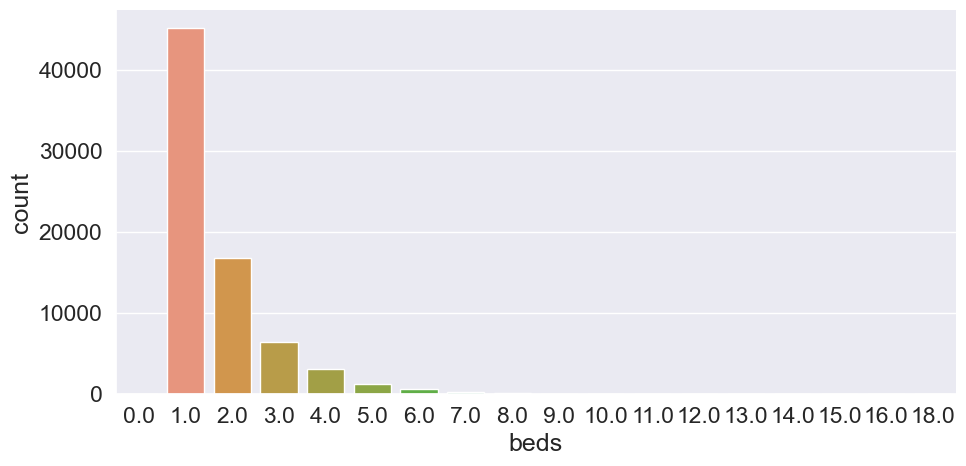

In [169]:
plot_catplot("beds", "count", 5, 2)

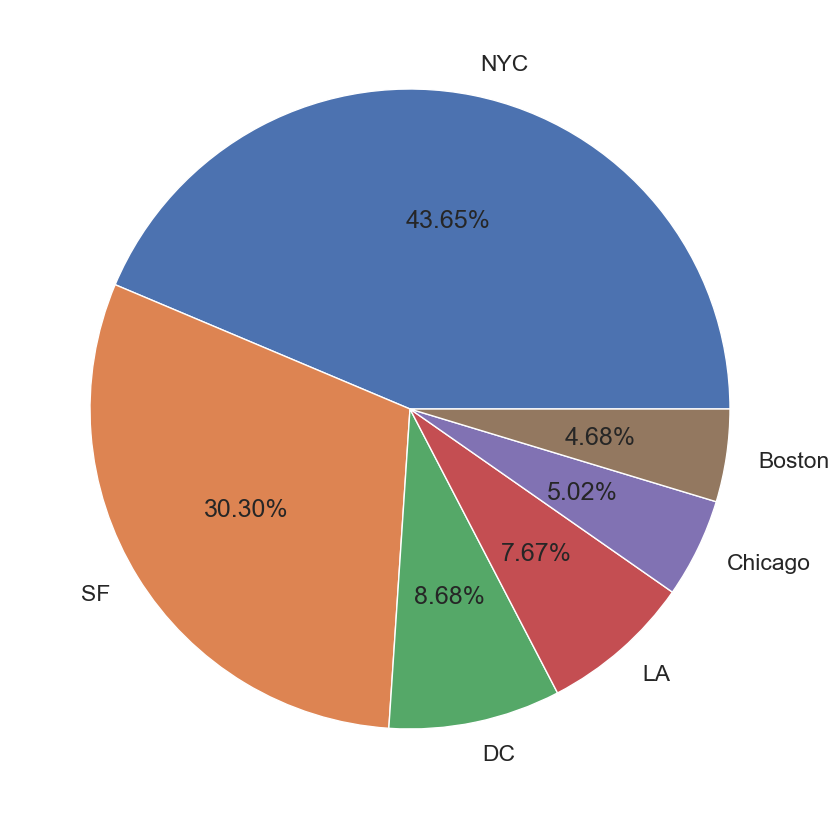

In [177]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

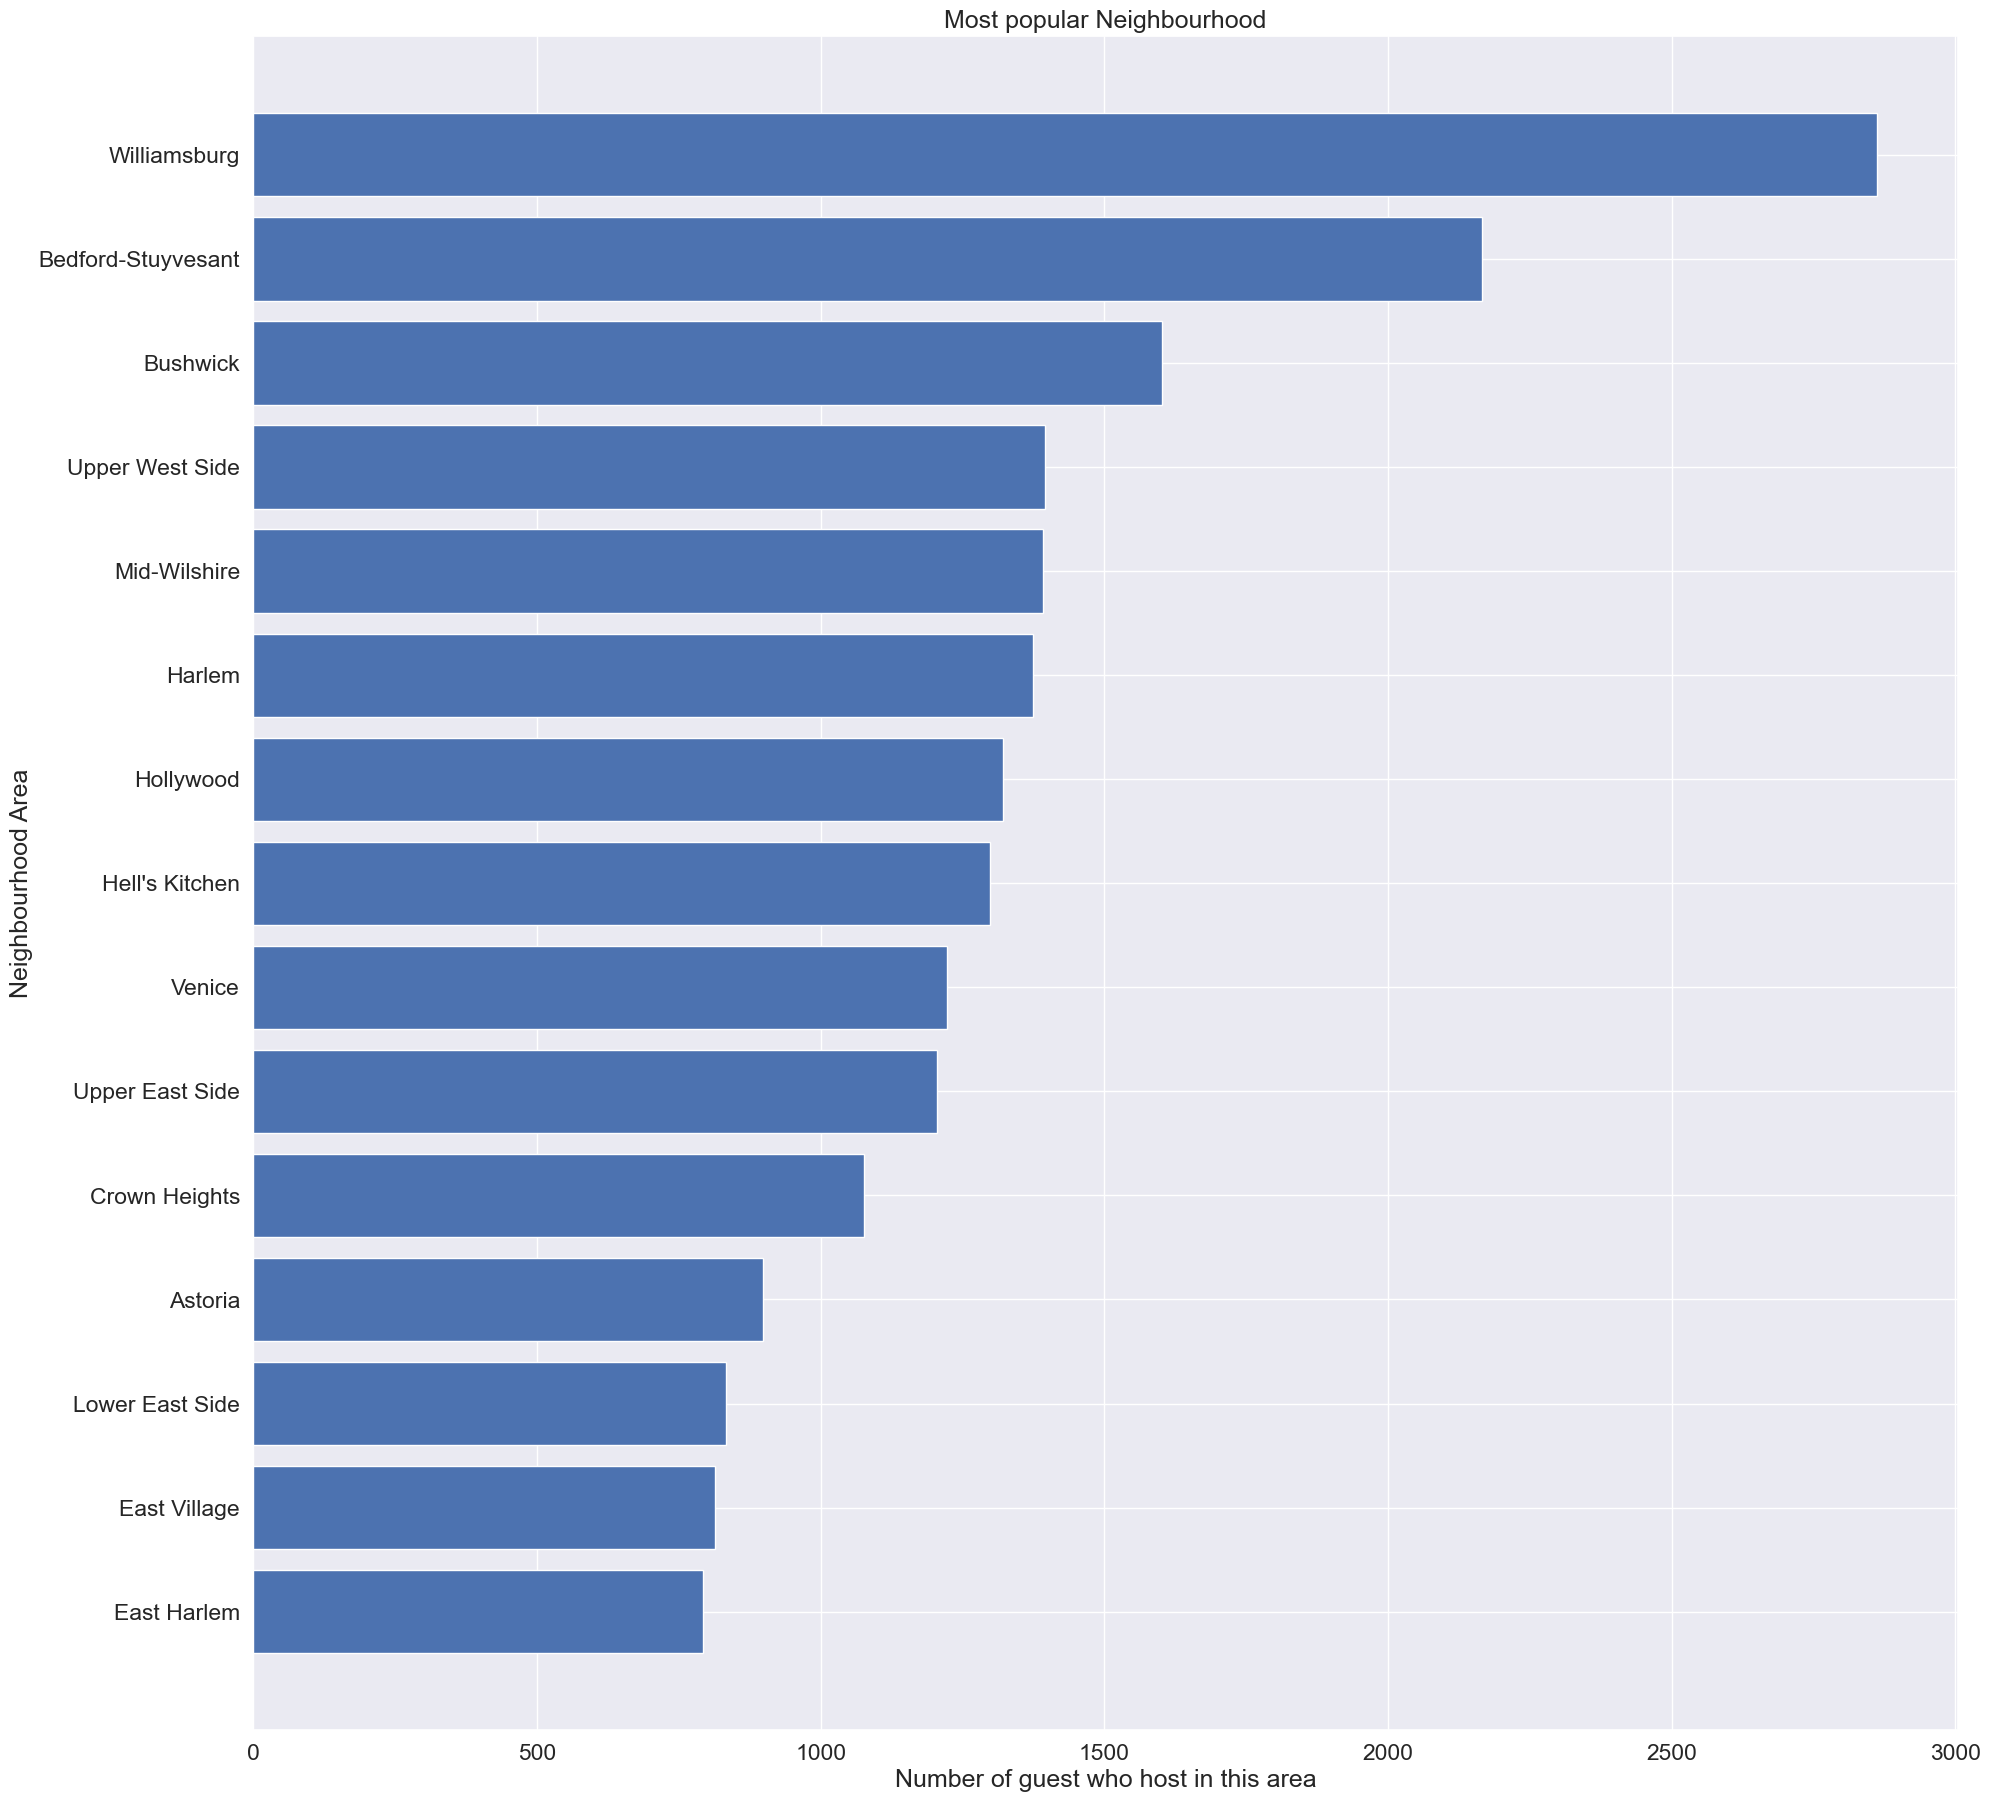

In [171]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

In [172]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values,rotation='vertical')
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [173]:
categoric_data = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categoric_data.append(column)
numeric_columns = df.select_dtypes(include=[np.number]).columns

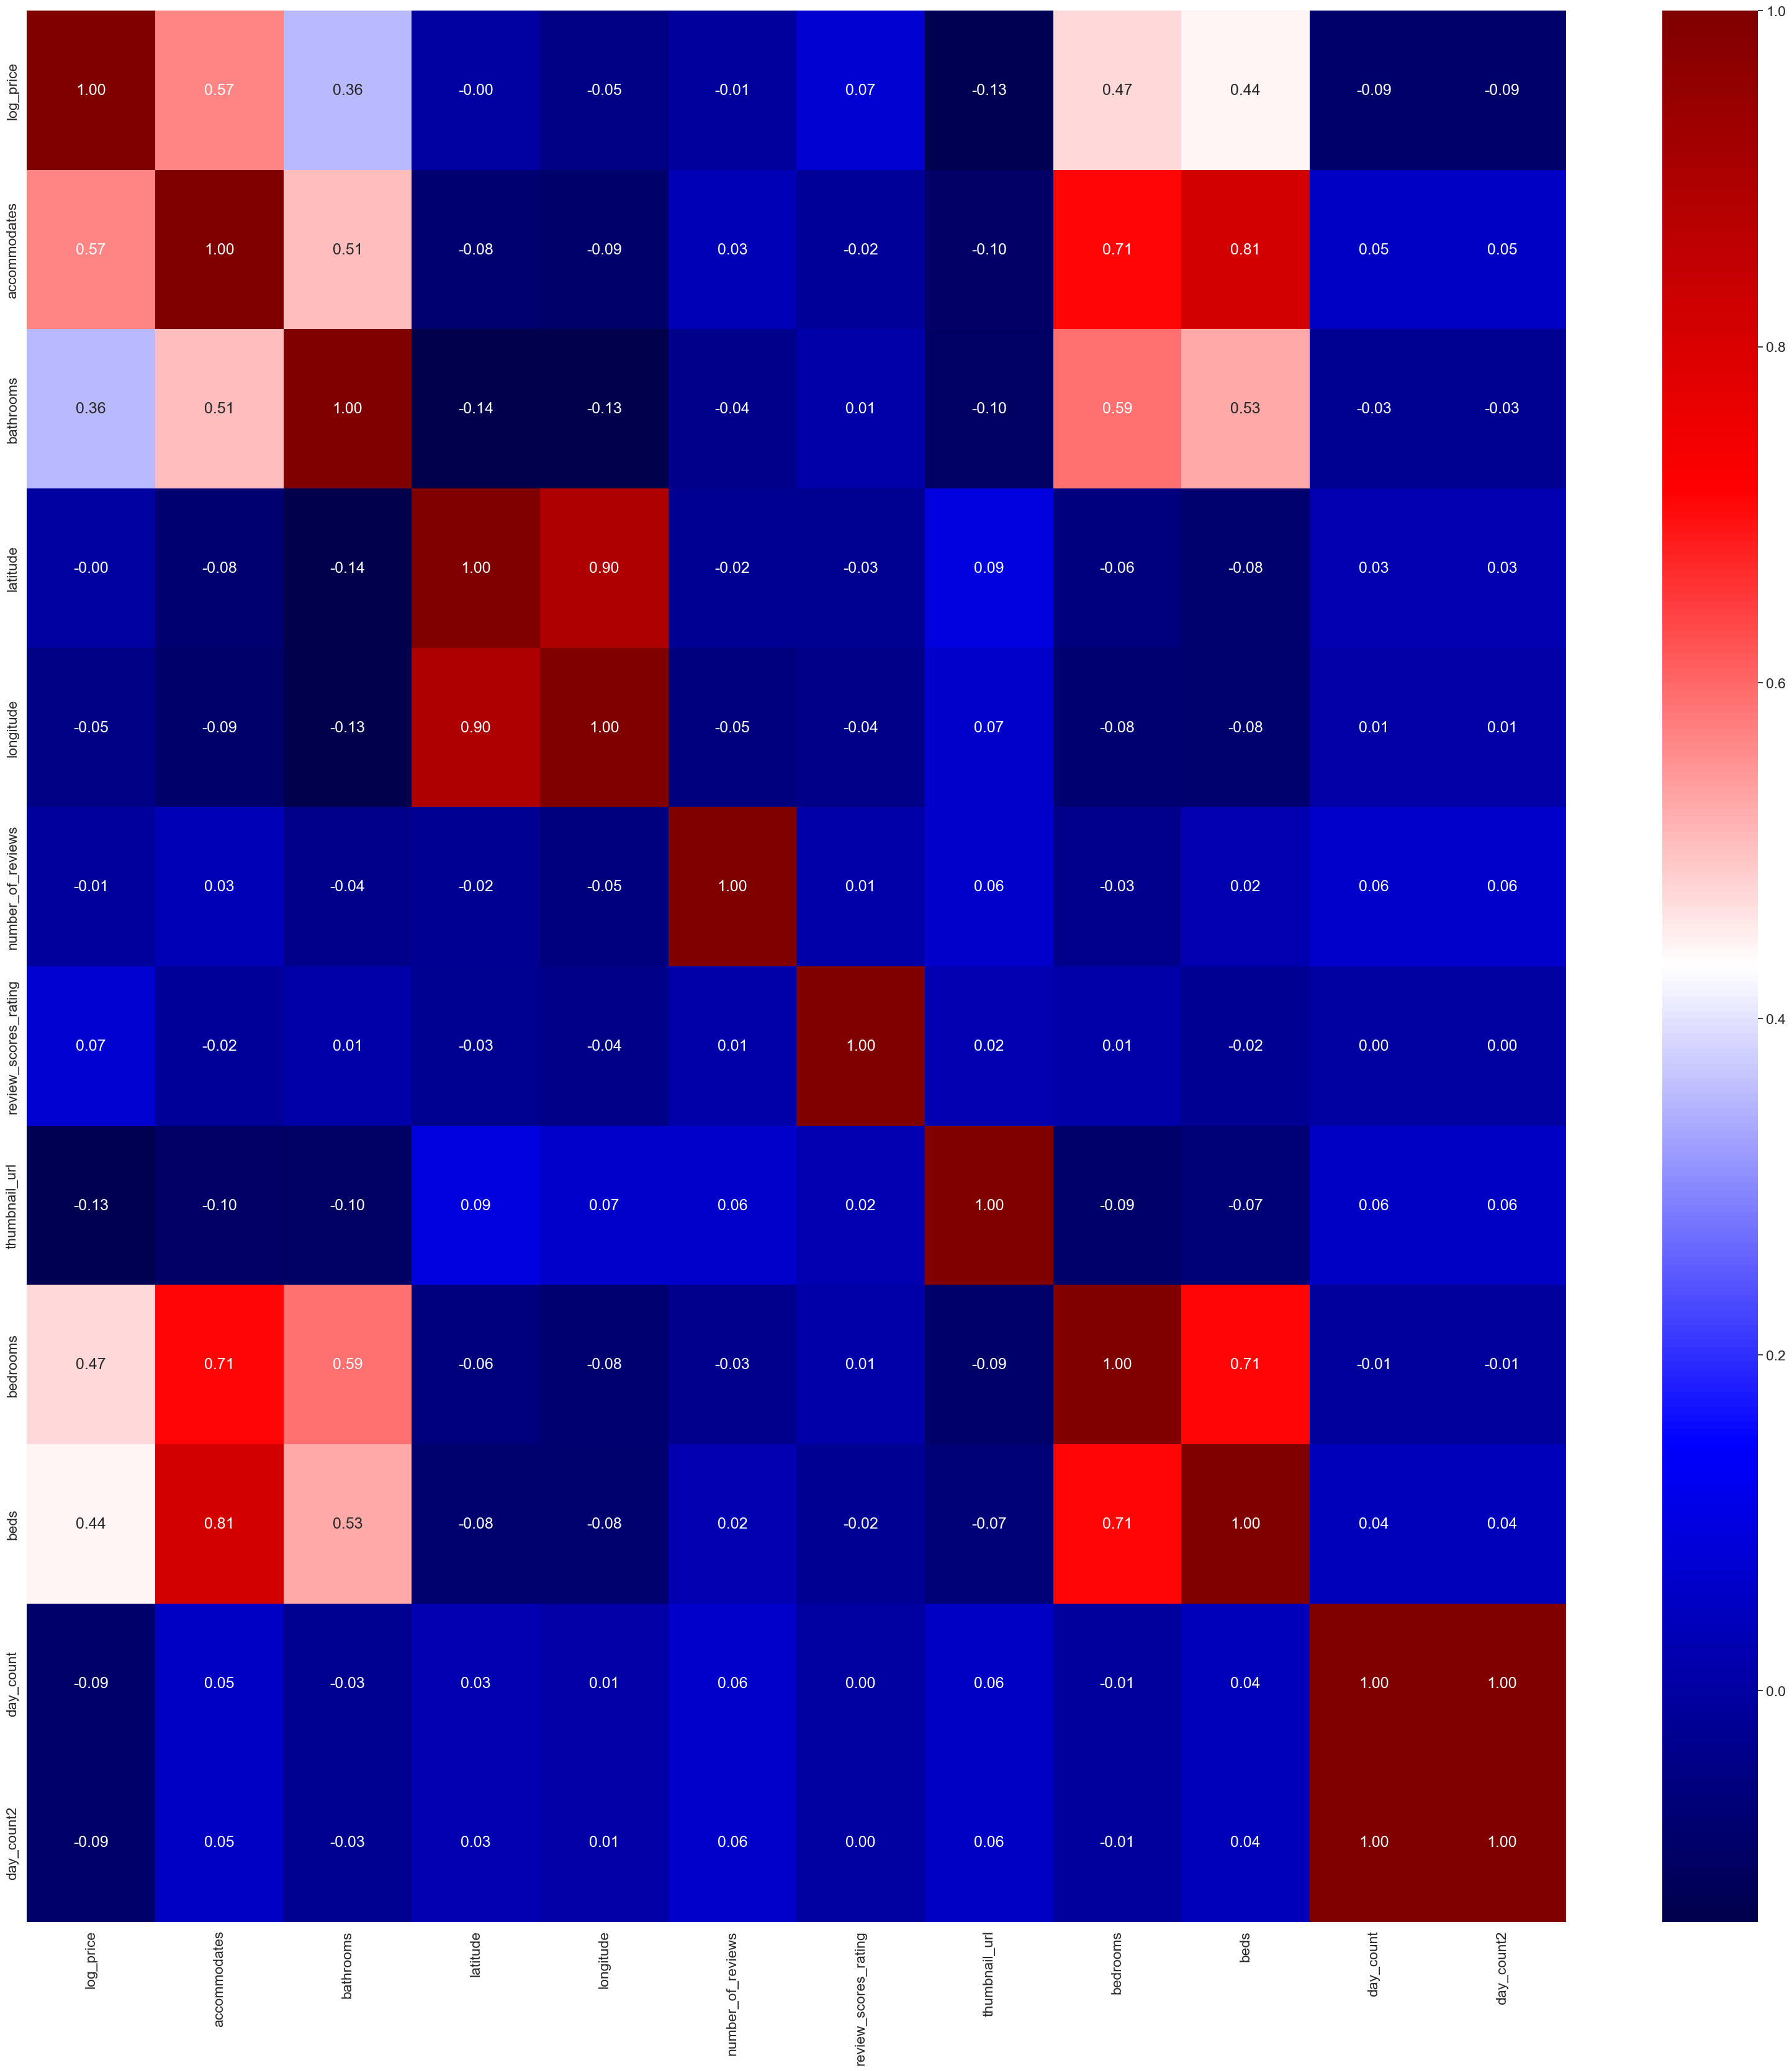

In [174]:
plt.figure(figsize = (40,40))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [175]:
def plot_hist(variable):
    plt.figure(figsize=(9, 3))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)  # Rotate x-label vertically
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [383]:
grouped_data = df[["neighbourhood", "log_price"]].groupby("neighbourhood").mean()
value_counts = df["neighbourhood"].value_counts()

# Add value counts to the grouped data
grouped_data['Value Counts'] = value_counts
grouped_data.sort_values(by="Value Counts", ascending=False)[:10]

,log_price,Value Counts
neighbourhood,,
Williamsburg,4.740027,2862
Bedford-Stuyvesant,4.423185,2166
Bushwick,4.274465,1601
Upper West Side,5.001347,1396
Mid-Wilshire,4.674082,1392
Harlem,4.636397,1374
Hollywood,4.688395,1321
Hell's Kitchen,5.131274,1299
Venice,5.128227,1222


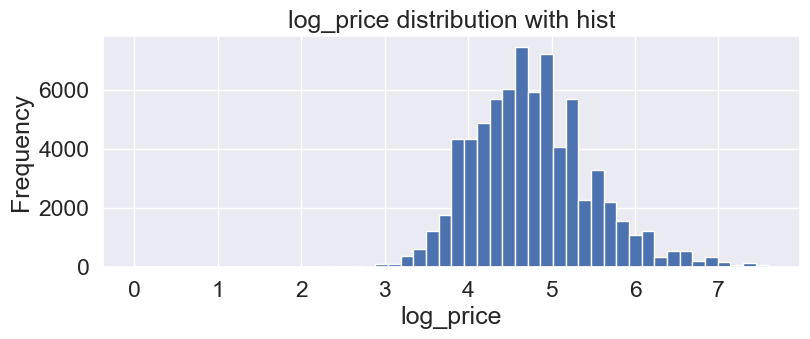

In [178]:

plot_hist('log_price')

#### Relationship between log_price and categorical columns

In [179]:
def groupby_target(column):
    # Relationship between target and categorical columns
    grouped_data = df[[column, "log_price"]].groupby(column).mean().sort_values(by="log_price", ascending=False)
    value_counts = df[column].value_counts()

    # Add value counts to the grouped data
    grouped_data['Value Counts'] = value_counts

    # Print the updated grouped data
    print(grouped_data)
   
    print(50*'--')

In [180]:
for i in categoric_data:
    groupby_target(i)

                    log_price  Value Counts
property_type                              
Timeshare           5.602600   77          
Lighthouse          5.521461   1           
Vacation home       5.420951   11          
Castle              5.368424   13          
Earth House         5.285391   4           
Tipi                5.246118   3           
Train               5.204399   2           
Boat                5.200865   65          
Serviced apartment  5.147467   21          
Villa               5.112427   179         
Boutique hotel      5.083352   69          
Condominium         5.026539   2658        
Island              5.010635   1           
Loft                5.007919   1244        
Other               4.946367   607         
Yurt                4.944360   9           
Cave                4.909373   2           
Treehouse           4.845520   7           
Townhouse           4.833539   1692        
In-law              4.816649   71          
House               4.797114   1

#### -Apartmant and house have more impact on price and they are most frequent

#### -Although the price of Entire home/apt are over the mean, they are most preferred.

#### -Bed type consisst of 72000 real bed. We consider this as realbad and others.

#### -Cancellation_policy. As the flexibity increases thhe price also increase. Expensive houses suffer more when the booking is cancelled. Therefore their policies are strickter. Since the extereme values are so few , we will add those in to strict.

#### -cleaning_fee has affect on price. This is not included in price. So extra. People may think it would be cleaner if there is cleaning fee.

#### -Cities have little affet on price ????

#### - accommodates has large affect on price. We will handle outliears.

#### -  bathrooms . Outliears need to be handled ????

#### - host_has_profile_pic this column consist of only 226 false value. So has almost no affect on price

#### - host_identity_verified has no affect. 

#### - Has almost no affexct on price. But has affect on preferebility

#### - bedrooms has large affect on price. Outliears need to be handled

#### - beds has large affect on price. Outliears need to be handled

#### - first_review and last_review. From last review to now, between first and last review , year of first review




In [181]:
def catplot(column):
    if len(df[column].unique()) <= 20:
        g = sns.catplot(x=column, y="log_price", data=df, kind="bar", height=8)
        g.set_ylabels("log_price")
        plt.show()

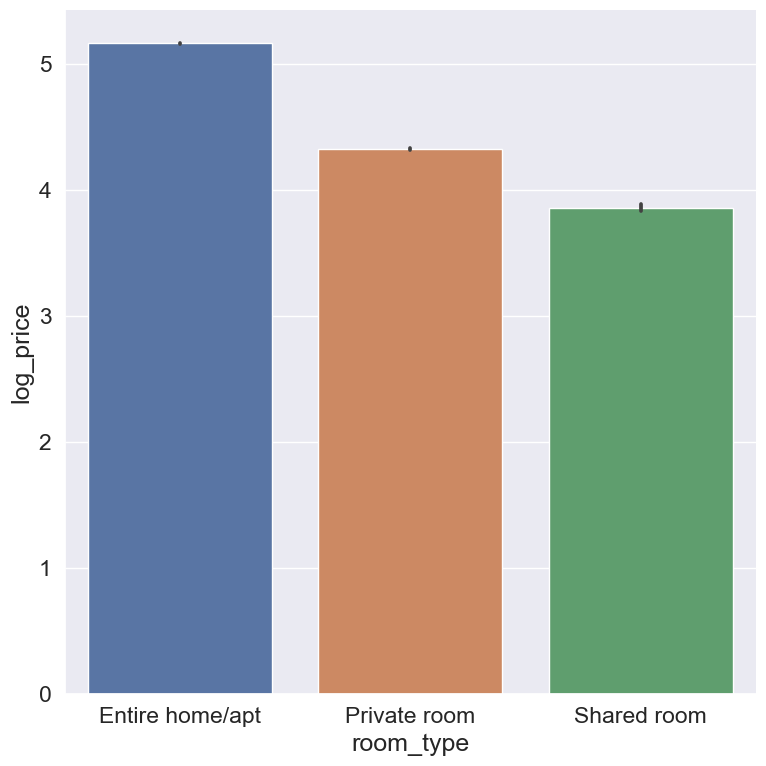

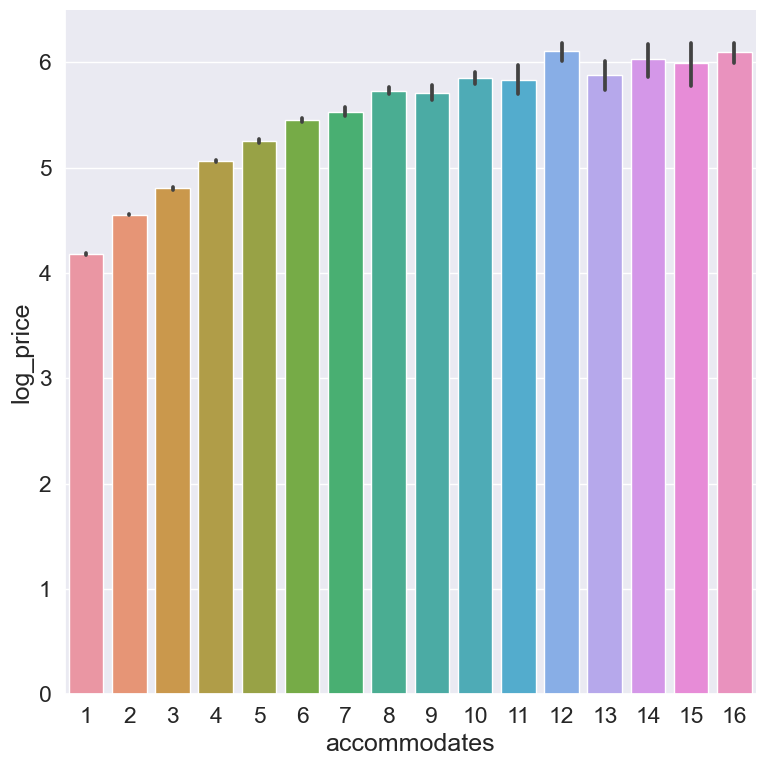

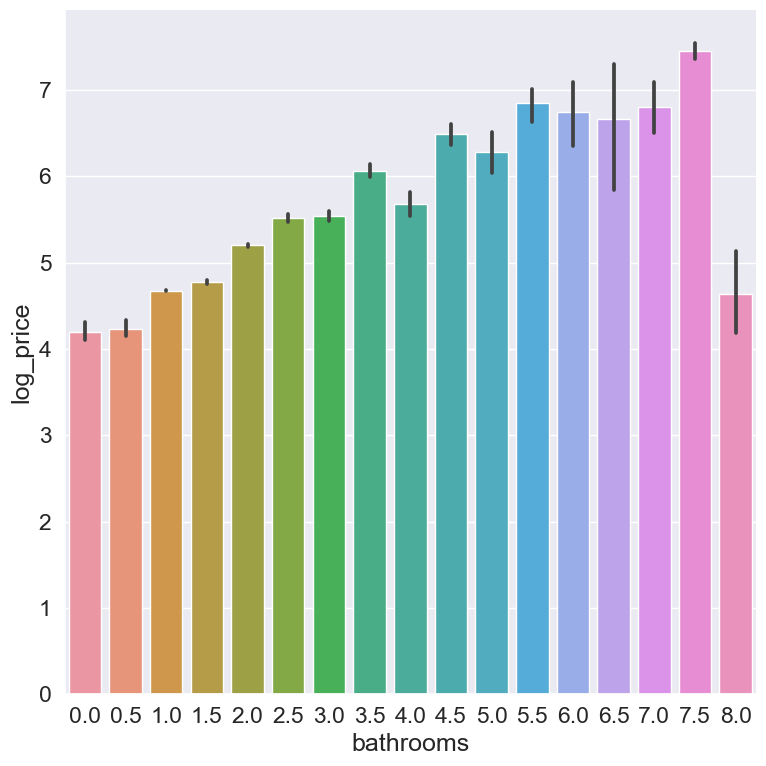

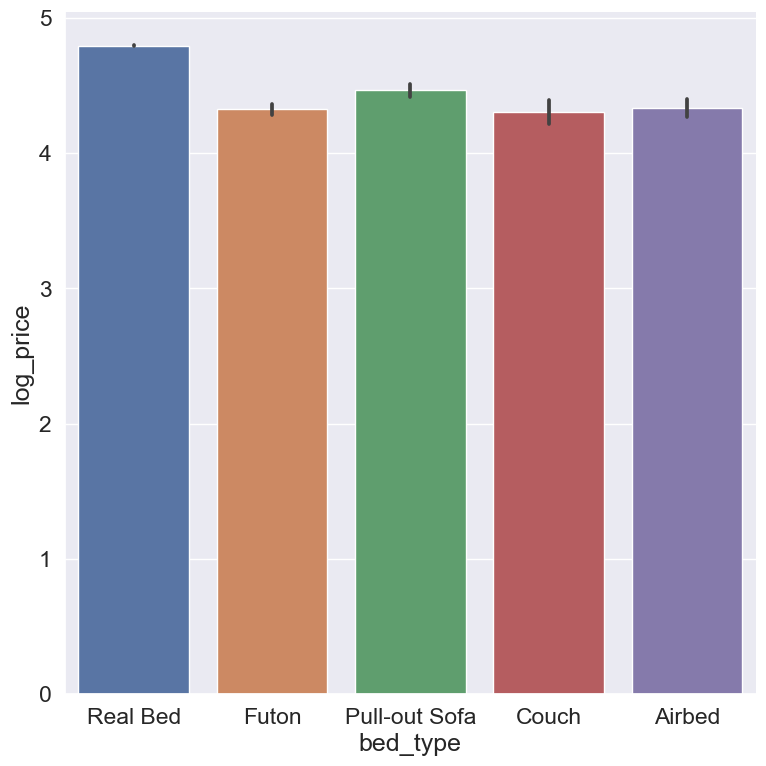

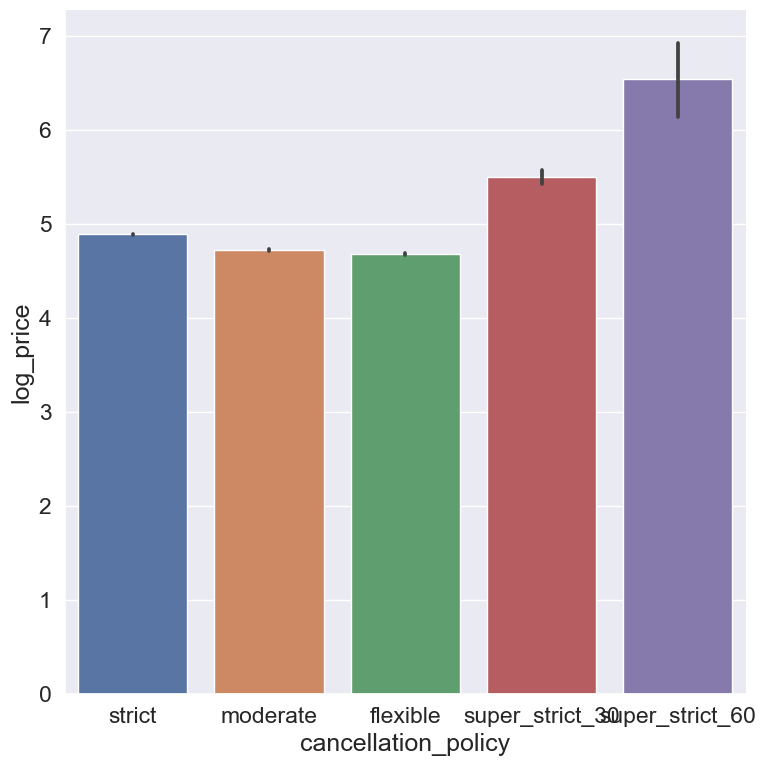

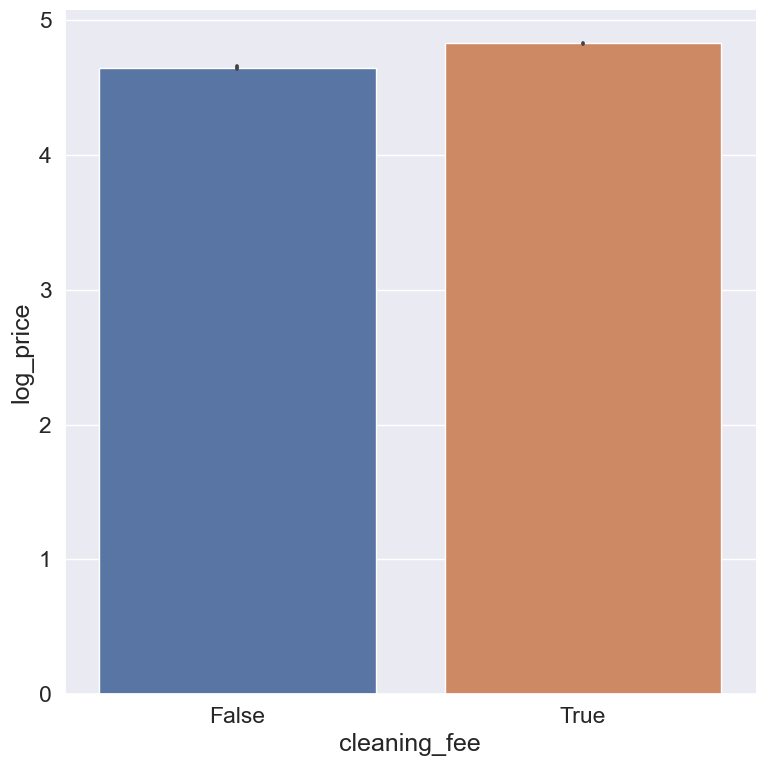

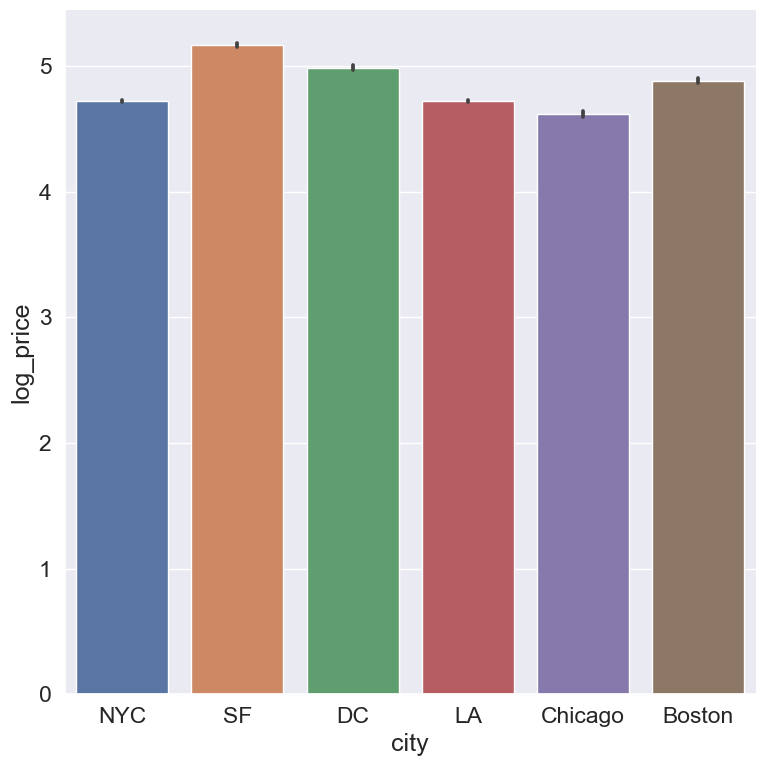

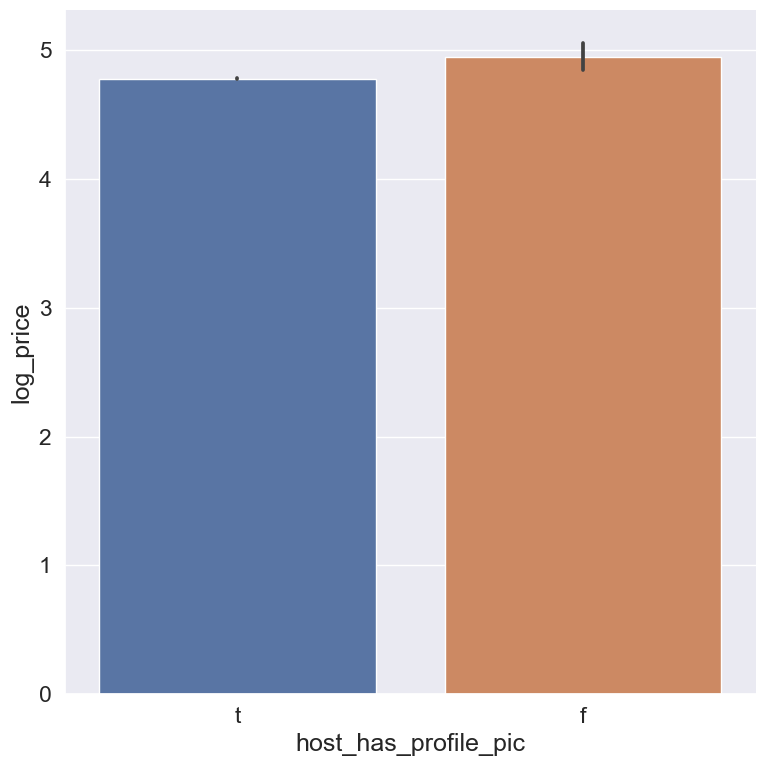

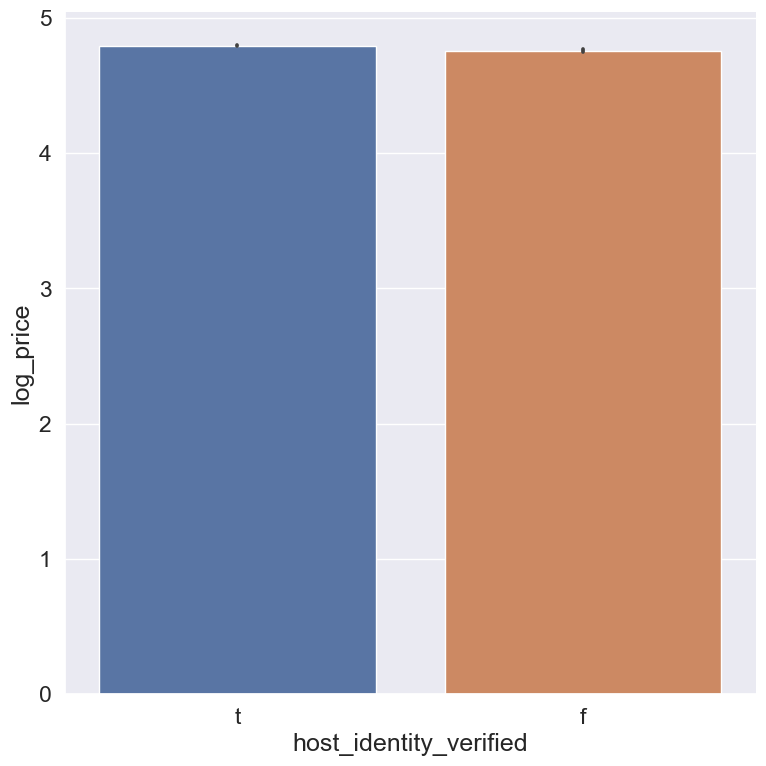

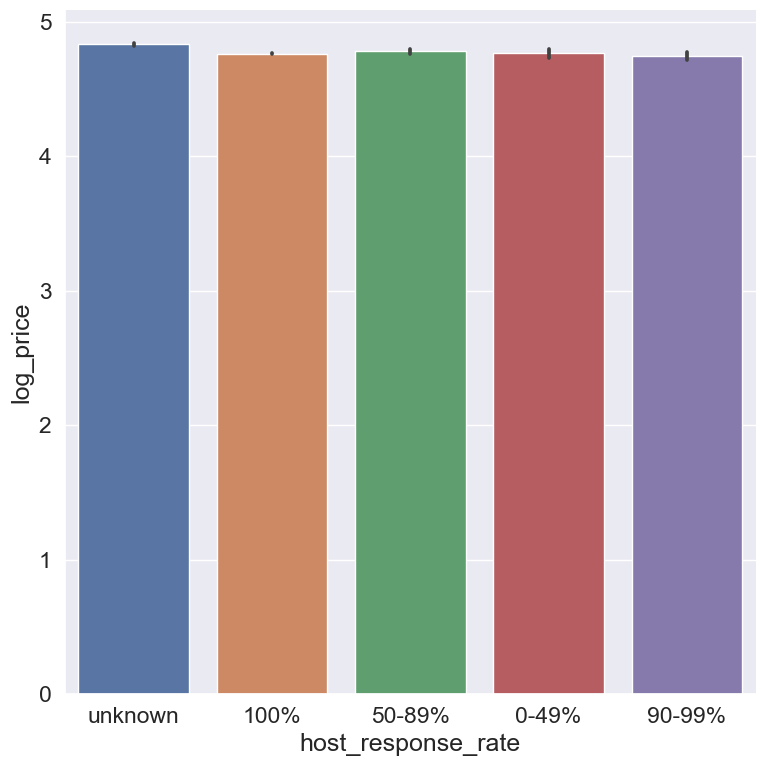

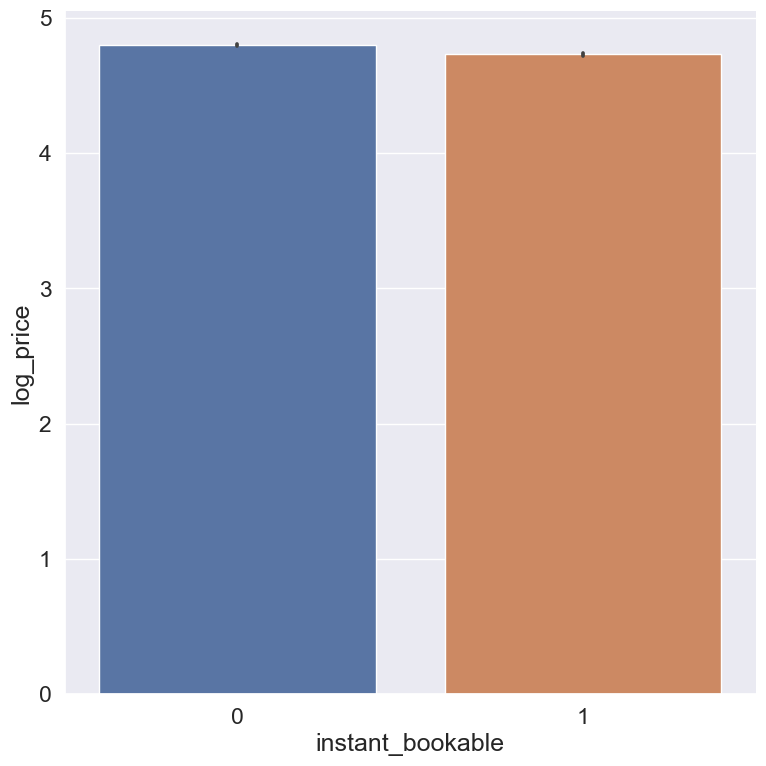

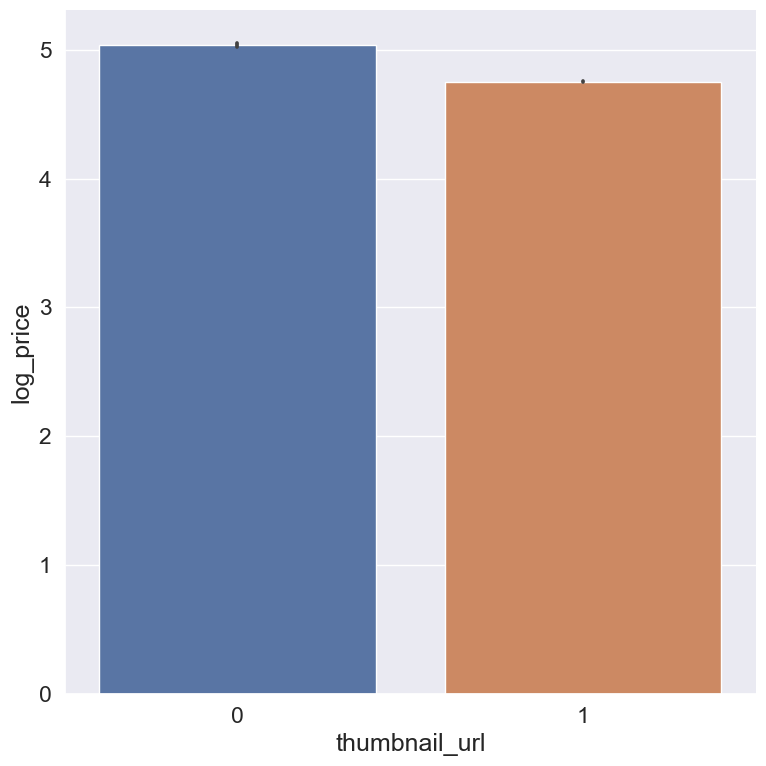

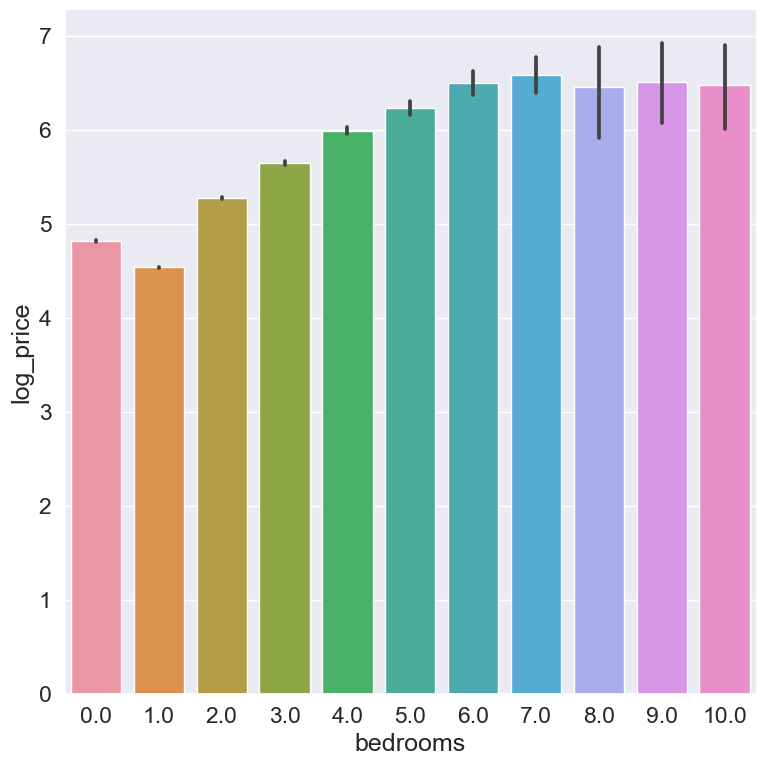

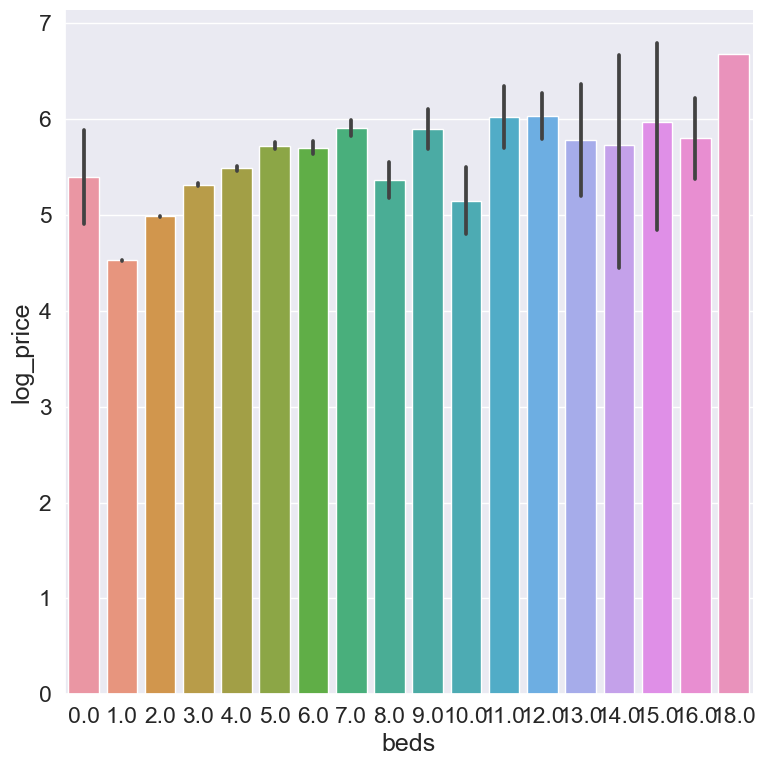

In [182]:
for i in df.columns :
    catplot(i)

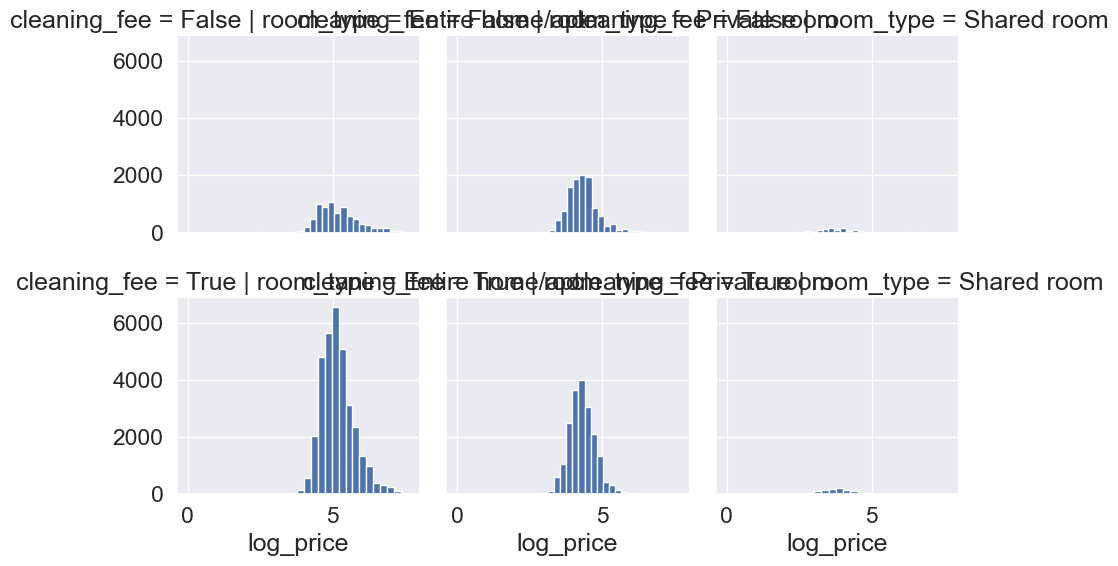

In [183]:
# Duzen yapilacak - unique degerleri az olanlarla denenecek
g = sns.FacetGrid(df, col = "room_type", row = "cleaning_fee")
g.map(plt.hist, "log_price", bins = 25)

plt.show()

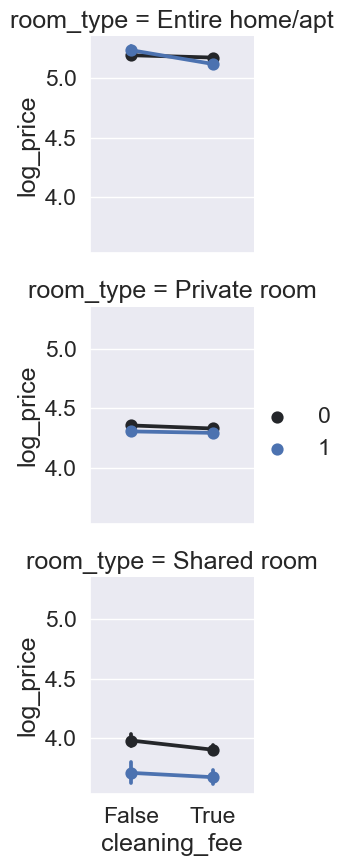

In [184]:
# ayni sekilde

g = sns.FacetGrid(df, row = "room_type")
g.map(sns.pointplot, "cleaning_fee","log_price","instant_bookable")
g.add_legend()
plt.show()

In [ ]:
# ayni sekilde
g = sns.FacetGrid(df, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

#### -neighbourhood. Williamsburg is most populer. Its open to further calculations

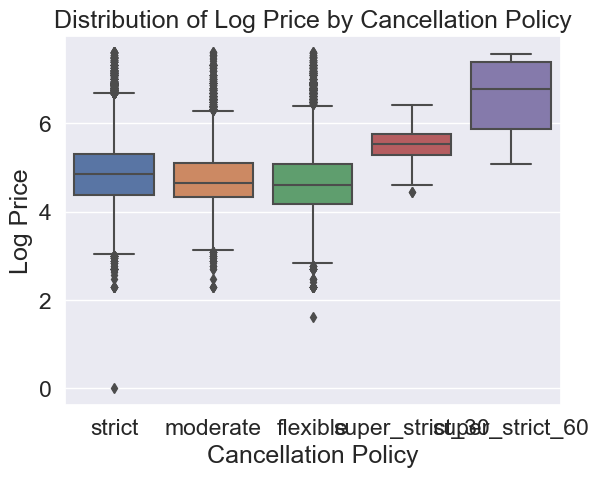

In [188]:
import seaborn as sns

sns.boxplot(x="cancellation_policy", y="log_price", data=df)
plt.xlabel("Cancellation Policy")
plt.ylabel("Log Price")
plt.title("Distribution of Log Price by Cancellation Policy")
plt.show()

In [189]:
def box_plot_target(df,column):
    sns.boxplot(x=column, y="log_price", data=df)
    plt.xlabel(f"{column}")
    plt.ylabel("Log Price")
    plt.title(f"Distribution of Log Price by {column}")
    plt.show()

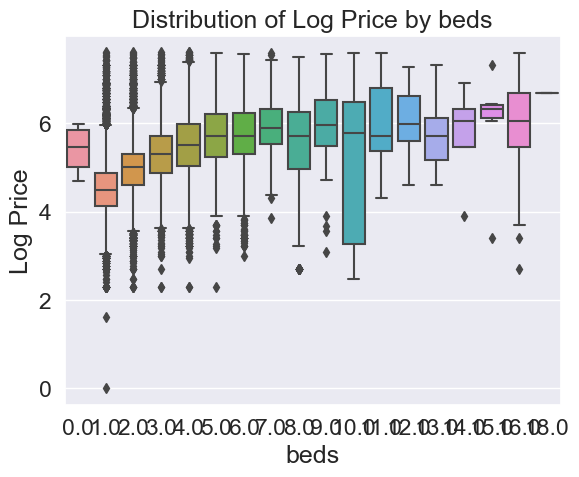

In [190]:
box_plot_target(df,'beds')

# OUTLIER HANDLE

In [194]:
def show_outliers(df,column):
    
    # plt.ylim(20000, max(df[column]) - 1000)
    plt.figure(figsize=(8, 6))
    # plt.xscale('log')
    plt.boxplot(x=df[column],patch_artist=True ,boxprops=dict(facecolor='lightblue', linewidth=2, edgecolor='black'))
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title('Outliers Plot of '+ column)
    plt.show()

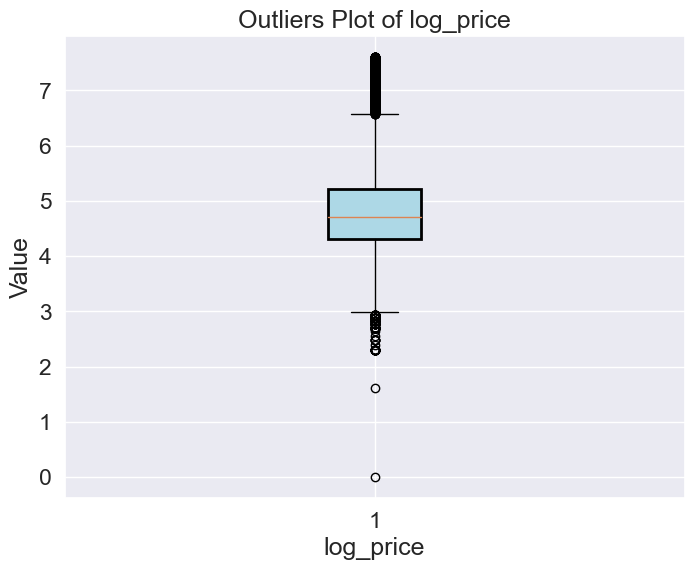

In [195]:
show_outliers(df,'log_price')

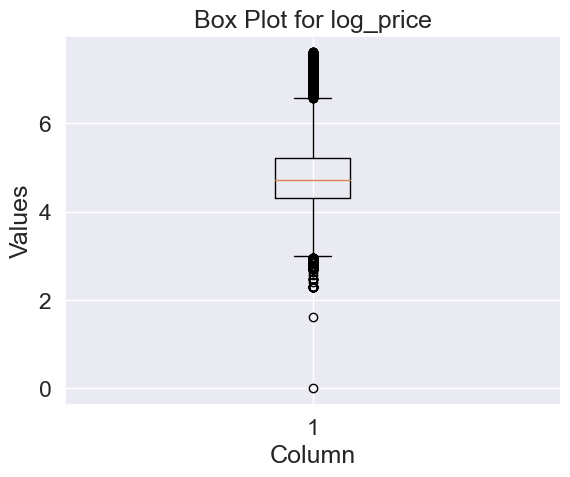

In [196]:
plt.figure()
plt.boxplot(df['log_price'])
plt.title(f"Box Plot for {'log_price'}")
plt.xlabel("Column")
plt.ylabel("Values")
plt.show()

In [296]:
df.log_price.max()

7.6004023345004

In [368]:
df_minmax = df.copy()
def outliers_minmax(column, q1, q2):
    min_val = df[column].quantile(q1)
    max_val = df[column].quantile(q2)
    
    df_minmax.loc[(df[column] <= min_val) | (df[column] >= max_val), column] = df[column].mean()
    
    print(min_val, max_val)

    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column} before outliers handling")
    plt.show()
    plt.boxplot(df_minmax[column])
    plt.title(f"Box Plot for {column} after outliers handling")
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.show()
    

In [392]:
df.loc[df['beds'] == 18]

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,day_count,day_count2
65163,6.684612,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",""Suitable for events"",""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Self Check-In"",""Smart lock"",""Private entrance"",""Outlet covers"",Bathtub,""High chair"",""Children’s books and toys"",""Window guards"",Crib,""Room-darkening shades""}",16,5.0,Real Bed,strict,True,NYC,...,New York City House for Large Groups/ Brooklyn,Bedford-Stuyvesant,70.0,95.0,1,11216,8.0,18.0,2116 days 11:03:57.578269,2116 days 11:03:50.500770


2.9444389791664403 6.894467199607331


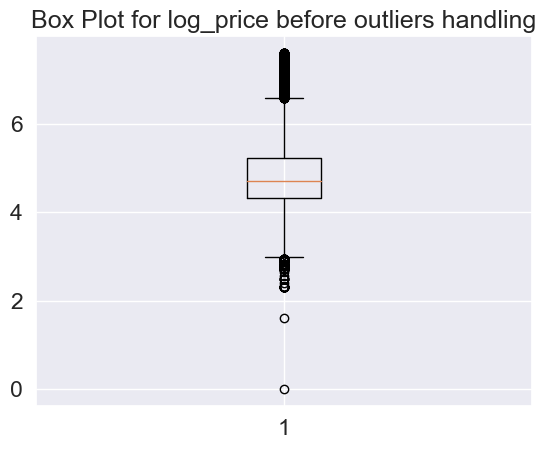

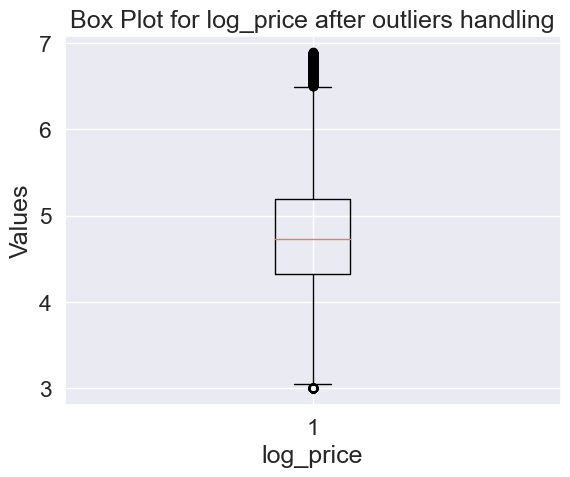

In [369]:
outliers_minmax("log_price",0.002,0.99)

0.0 6.0


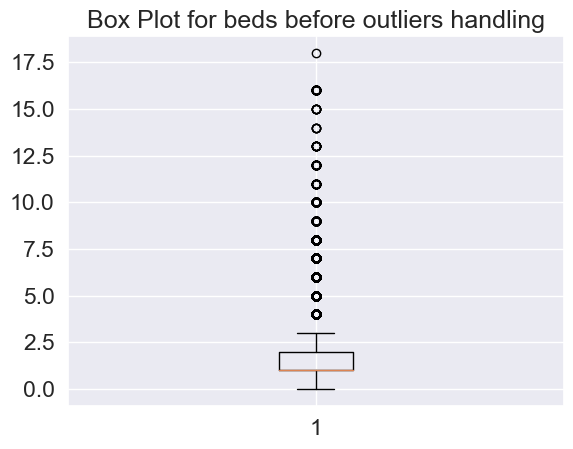

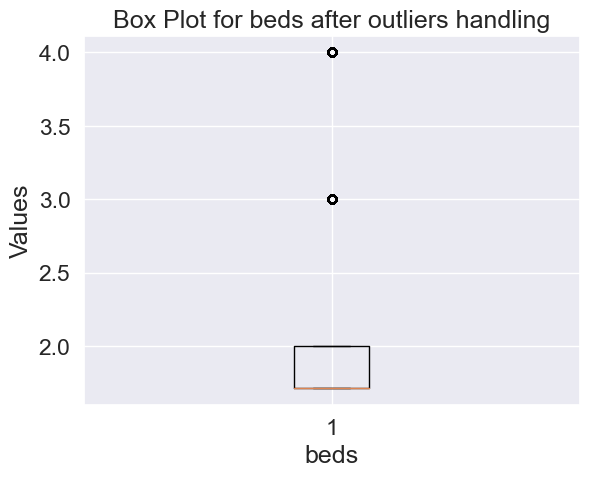

In [389]:
outliers_minmax('beds',0.00,0.99)

In [390]:
df_minmax["beds"].value_counts()

beds
1.711379    47769
2.000000    16835
3.000000    6442 
4.000000    3065 
Name: count, dtype: int64

In [318]:
new_df=pd.DataFrame()
min= df.log_price.quantile(0.002)
max = df.log_price.quantile(0.99)
min, max

(2.9444389791664403, 6.894467199607331)

In [ ]:
new_df= df[(df.log_price>min)&(df.log_price<max)]
new_df.head()

In [201]:
new_df.shape

(72950, 30)

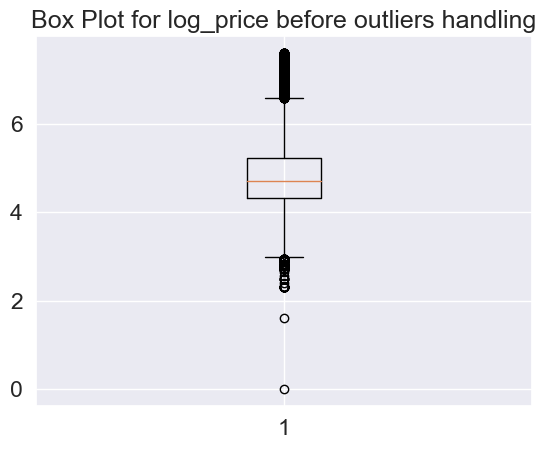

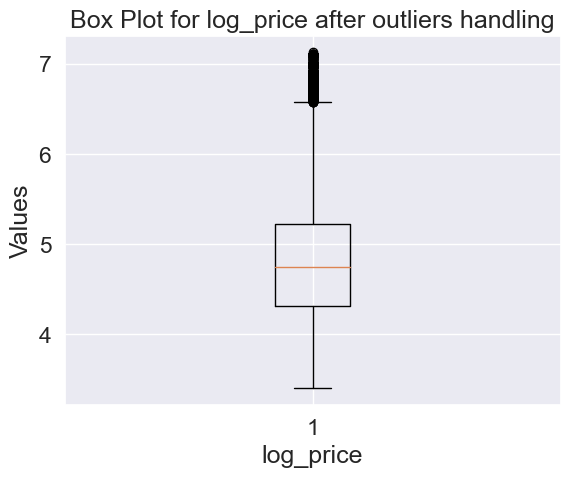

In [213]:
plt.figure()
plt.boxplot(df["log_price"])
plt.title("Box Plot for log_price before outliers handling")
plt.show()
plt.boxplot(new_df["log_price"])
plt.title("Box Plot for log_price after outliers handling")
plt.xlabel("log_price")
plt.ylabel("Values")
plt.show()

In [202]:
df2 = df.copy()

In [238]:
df3.shape

(74111, 30)

In [203]:
z_scores = pd.DataFrame()

z_score = (df2["log_price"] - df2["log_price"].mean()) / df2["log_price"].std()
z_scores["log_price"] = z_score

# Set the threshold for identifying outliers
z_score_threshold = 3

# Replace the outliers with the mean value of each "log_price"

df2["log_price"] = np.where(z_scores["log_price"].abs() > z_score_threshold, df2["log_price"].mean(), df2["log_price"])

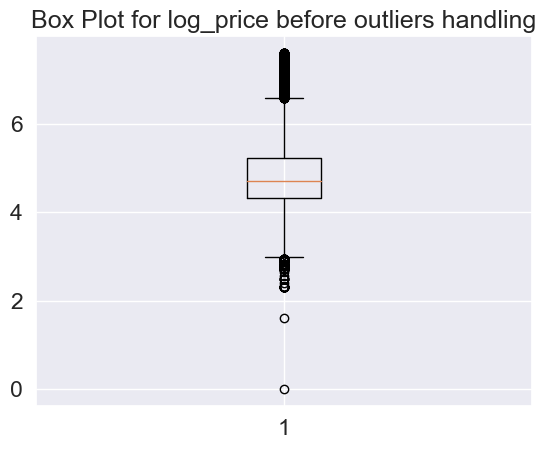

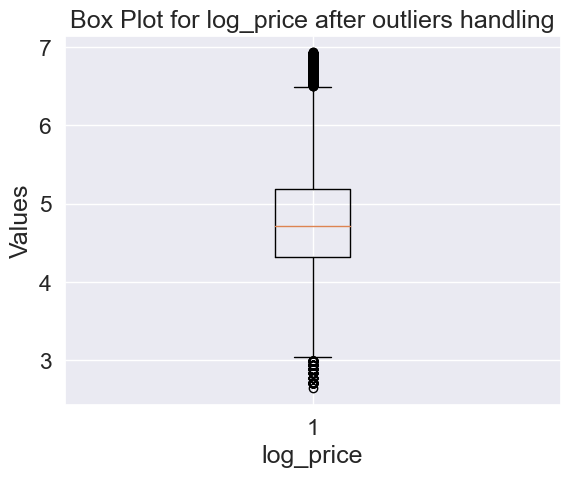

In [204]:
plt.figure()
plt.boxplot(df["log_price"])
plt.title("Box Plot for log_price before outliers handling")
plt.show()
plt.boxplot(df2["log_price"])
plt.title("Box Plot for log_price after outliers handling")
plt.xlabel("log_price")
plt.ylabel("Values")
plt.show()

In [205]:
df2.shape

(74111, 30)

In [206]:
upper_threshold = df['log_price'].mean()+3*df['log_price'].std()
upper_threshold

6.934250461830128

In [207]:
lower_threshold = df['log_price'].mean()-3*df['log_price'].std()
lower_threshold

2.629887754781144

In [208]:
# Aykırı değerleri çıkarmak
df_cleaned = df[~((df['log_price'] < lower_threshold) | (df['log_price'] > upper_threshold))]

# Aykırı değerleri sınırlamak
df_clipped = df.copy()
df_clipped['log_price'] = df_clipped['log_price'].clip(lower_threshold, upper_threshold)

In [209]:
df_cleaned.shape

(73592, 30)

In [215]:
df_clipped.shape

(74111, 30)

In [ ]:
df.loc[df["log_price"] > upper_threshold]

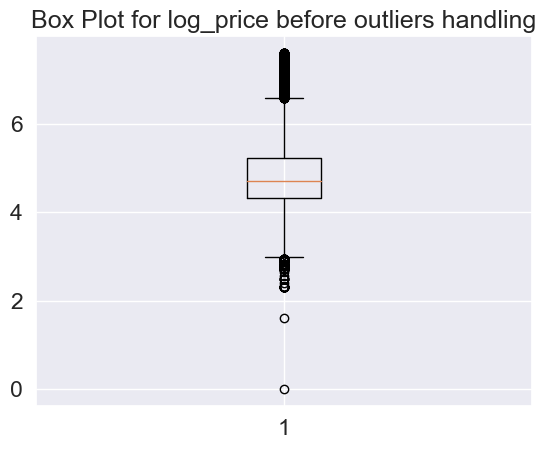

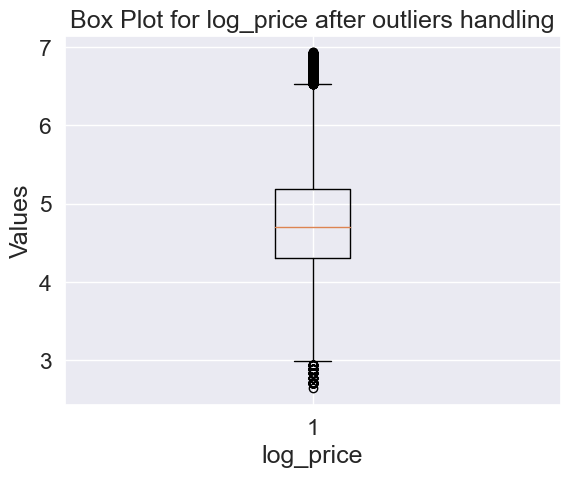

In [212]:
plt.figure()
plt.boxplot(df["log_price"])
plt.title("Box Plot for log_price before outliers handling")
plt.show()
plt.boxplot(df_cleaned["log_price"])
plt.title("Box Plot for log_price after outliers handling")
plt.xlabel("log_price")
plt.ylabel("Values")
plt.show()

In [295]:
df_cleaned['beds'].value_counts()

beds
1.0     45057
2.0     16729
3.0     6346 
4.0     2977 
5.0     1231 
6.0     628  
7.0     205  
8.0     176  
10.0    80   
9.0     66   
16.0    32   
12.0    24   
11.0    19   
13.0    8    
15.0    5    
14.0    4    
0.0     4    
18.0    1    
Name: count, dtype: int64

In [ ]:
df4 = pd.dataframe()
def outlier_1(df,column):
    upper_threshold = df[column].mean()+3*df[column].std()
    lower_threshold = df[column].mean()-3*df[column].std()
    df_cleaned = df[~((df[column] < lower_threshold) | (df[column] > upper_threshold))]
    df_clipped = df.copy()
    df_clipped[column] = df_clipped[column].clip(lower_threshold, upper_threshold)
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column} before outliers handling")
    plt.show()
    plt.boxplot(df_cleaned[column])
    plt.title(f"Box Plot for {column} after outliers handling")
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.show()
for column in numeric_columns:
    outlier_1(df,column)

In [408]:
df3 = df_origin.copy()

def outlier_z(df,column,threshhold=3):
    
    z_scores = pd.DataFrame()

    z_score = (df3[column] - df3[column].mean()) / df3[column].std()
    z_scores[column] = z_score

    # Set the threshold for identifying outliers
    z_score_threshold = threshhold

    # Replace the outliers with the mean value of each column

    df3[column] = np.where(z_scores[column].abs() > z_score_threshold, df3[column].mean(), df3[column])
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column} before outliers handling")
    plt.show()
    plt.boxplot(df3[column])
    plt.title(f"Box Plot for {column} after outliers handling")
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.show()

In [242]:
numeric_columns


Index(['log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'thumbnail_url',
       'bedrooms', 'beds', 'day_count', 'day_count2'],
      dtype='object')

In [413]:
df3['number_of_reviews'].mean()

20.685702826228308

In [416]:
df3.loc[df["number_of_reviews"] == df3['number_of_reviews'].mean()]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds


In [402]:
df['number_of_reviews'].describe()

count    74111.000000
mean     25.361796   
std      36.302339   
min      1.000000    
25%      5.000000    
50%      19.000000   
75%      23.000000   
max      605.000000  
Name: number_of_reviews, dtype: float64

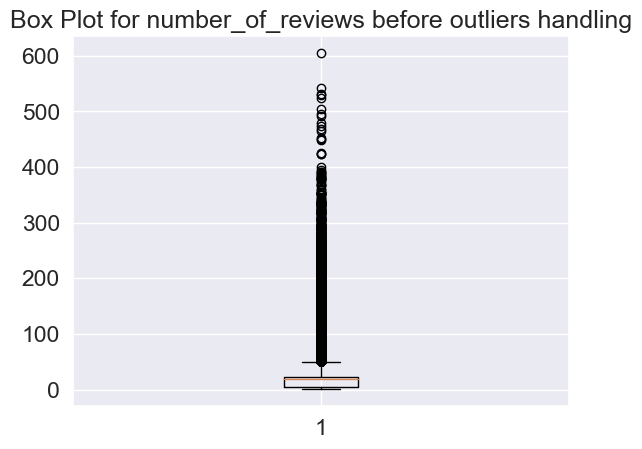

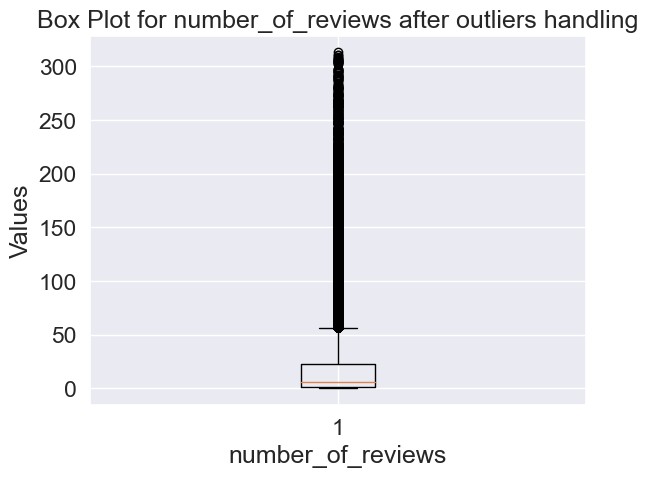

In [417]:
outlier_z(df,'number_of_reviews',8)

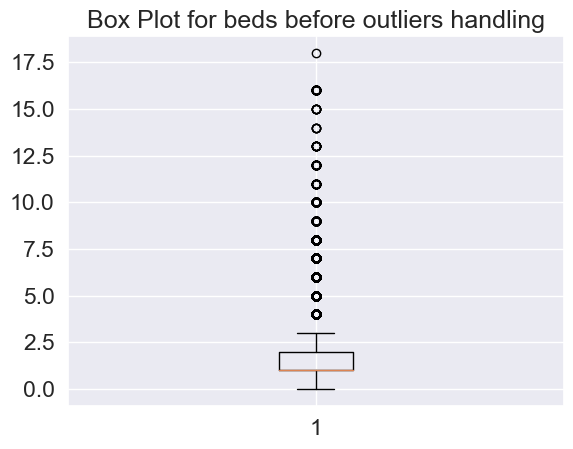

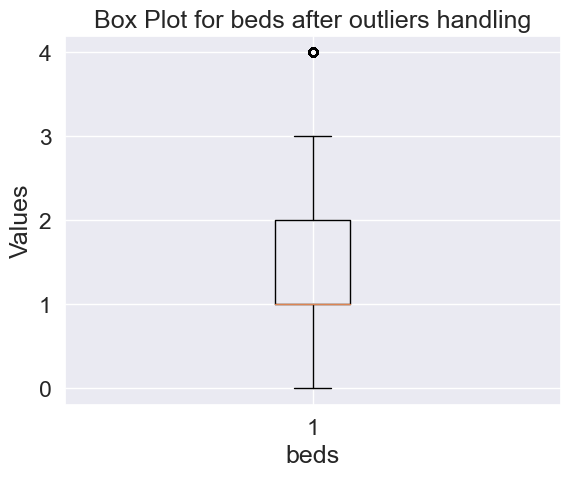

In [276]:
outlier_z(df,'beds',2)

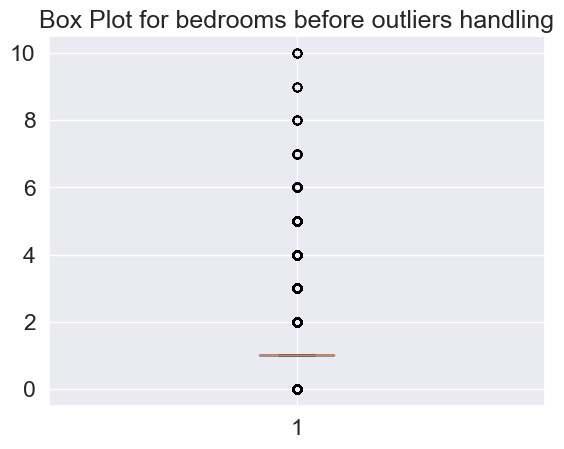

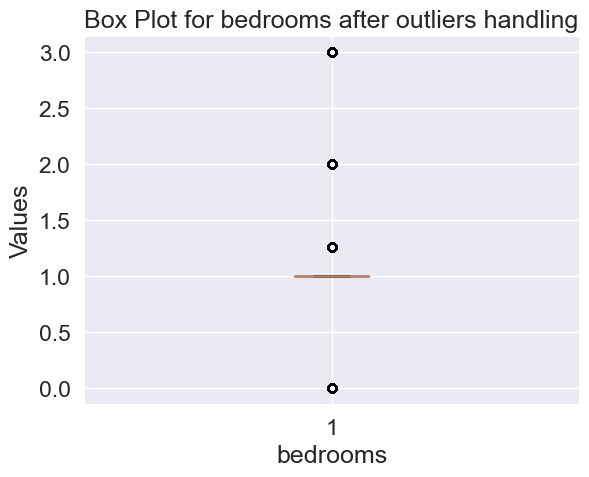

In [277]:
outlier_z(df,'bedrooms',3)

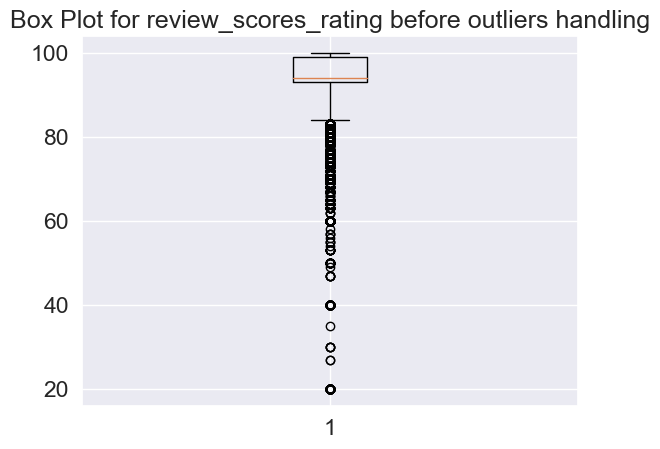

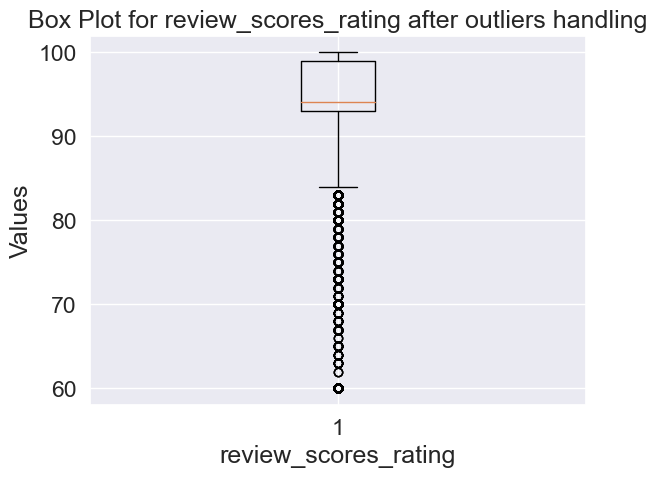

In [278]:
outlier_z(df,'review_scores_rating',5)

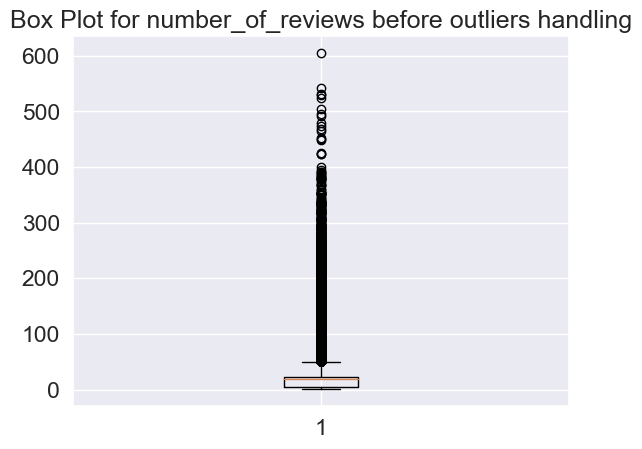

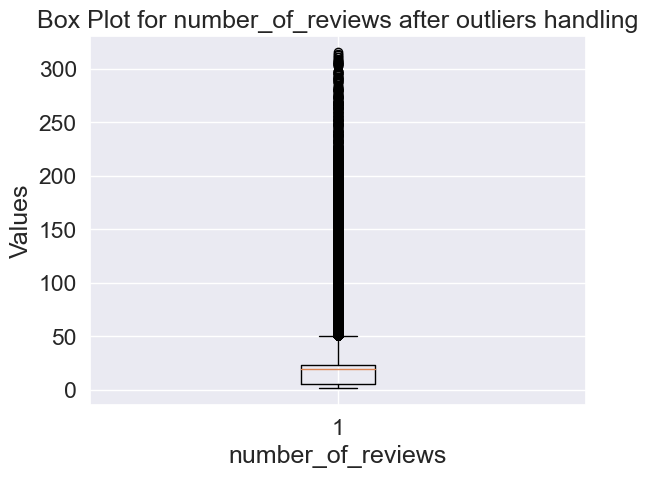

In [279]:
outlier_z(df,'number_of_reviews',8)

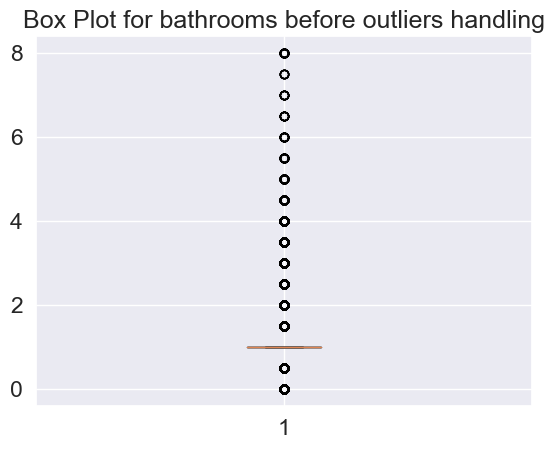

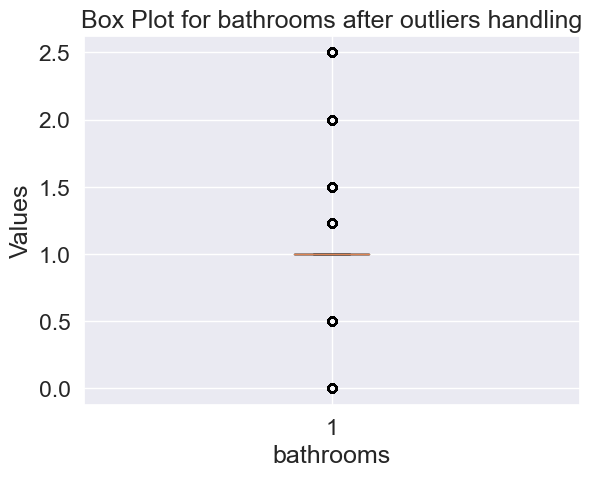

In [280]:
outlier_z(df,'bathrooms',3)

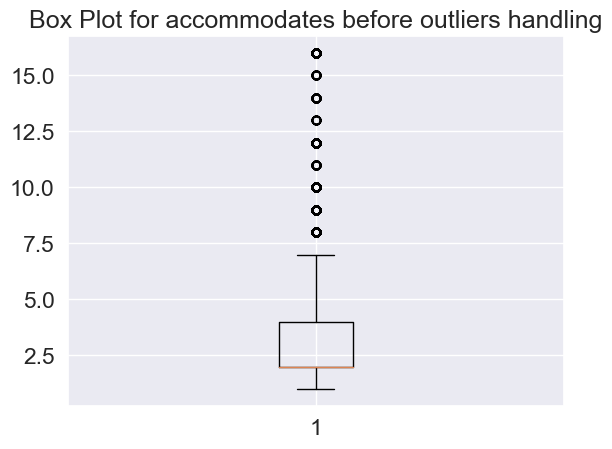

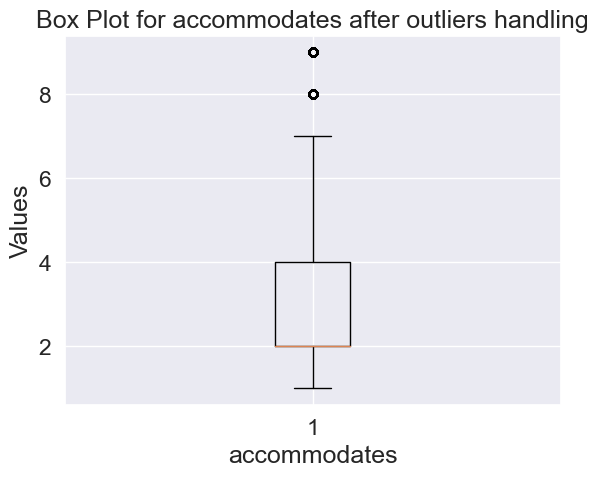

In [281]:
outlier_z(df,'accommodates',3)

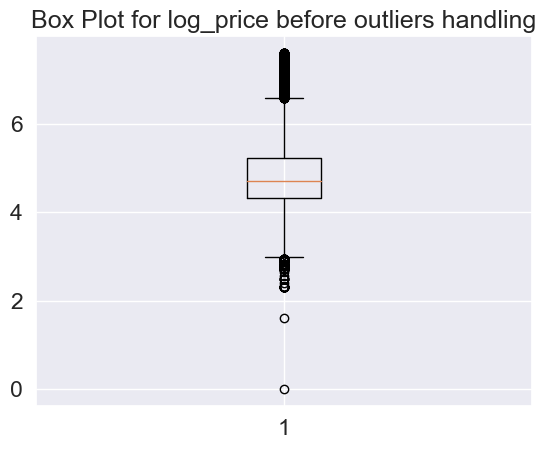

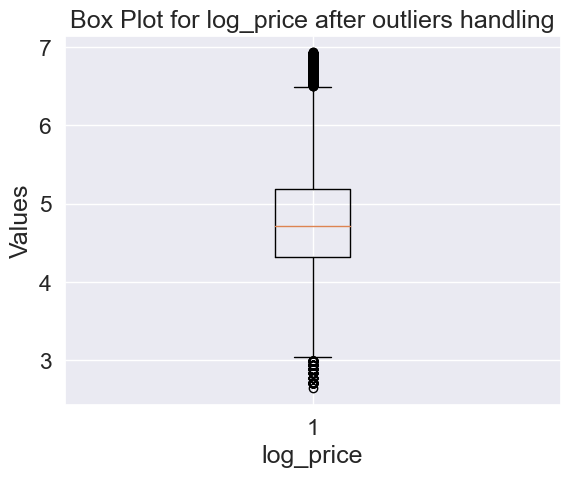

In [282]:

outlier_z(df,'log_price',3)

In [285]:
df3['beds'].value_counts()

beds
1.000000    45144
2.000000    16835
3.000000    6442 
4.000000    3065 
1.711379    2621 
0.000000    4    
Name: count, dtype: int64

In [394]:
df3['bedrooms'].value_counts()

bedrooms
1.000000    49784
2.000000    11442
0.000000    6715 
3.000000    4309 
1.266695    1861 
Name: count, dtype: int64

In [288]:
target_correlation1 = df3[numeric_columns].corr()['log_price'].abs().sort_values(ascending=False)
target_correlation1

log_price               1.000000
accommodates            0.538931
beds                    0.424145
bedrooms                0.376133
bathrooms               0.273027
thumbnail_url           0.118879
review_scores_rating    0.076111
day_count               0.070278
day_count2              0.070278
longitude               0.041386
latitude                0.007265
number_of_reviews       0.006135
Name: log_price, dtype: float64

In [289]:
target_correlation = df[numeric_columns].corr()['log_price'].abs().sort_values(ascending=False)
target_correlation

log_price               1.000000
accommodates            0.567574
bedrooms                0.472835
beds                    0.441619
bathrooms               0.355174
thumbnail_url           0.125523
day_count               0.089954
day_count2              0.089954
review_scores_rating    0.074822
longitude               0.047529
number_of_reviews       0.012577
latitude                0.002193
Name: log_price, dtype: float64

In [292]:
target_correlation = df_clipped[numeric_columns].corr()['log_price'].abs().sort_values(ascending=False)
target_correlation



log_price               1.000000
accommodates            0.567130
bedrooms                0.470919
beds                    0.440762
bathrooms               0.349601
thumbnail_url           0.125140
day_count               0.087883
day_count2              0.087883
review_scores_rating    0.075332
longitude               0.046912
number_of_reviews       0.012180
latitude                0.000927
Name: log_price, dtype: float64

In [291]:
df_cleaned.shape

(73592, 30)